# Análisis de Reservas de Hoteles

## Explicación del caso

El conjunto de datos de Reservas de Hoteles contiene información sobre la frecuencia y duración de las reservas, así como las preferencias y comportamientos de reserva de los clientes. Además, incluye información sobre las características del hotel, como el tipo de habitación reservada, el precio y la política de cancelación. Estos datos pueden utilizarse para analizar los patrones de reserva de los clientes, predecir tendencias futuras y personalizar estrategias de marketing y precios.

El objetivo principal de este proyecto es realizar un análisis exploratorio de datos (EDA) sobre las reservas de hoteles. Investigaremos los patrones de reserva generales y cómo interactúan los diferentes factores que influyen en las reservas. Además, identificaremos preferencias de los clientes y posibles áreas de mejora para la gestión hotelera.

Al comprender mejor el comportamiento de reserva de los clientes, podemos tomar decisiones más informadas para optimizar la ocupación del hotel y maximizar los ingresos. Esto puede incluir estrategias como promociones dirigidas, descuentos específicos o mejoras en el servicio al cliente.

* **hotel**: Nombre del hotel (Ciudad o Resort)
* **is_canceled**: Si la reserva fue cancelada o no (0 para no cancelada y 1 para cancelada)
* **lead_time**: Tiempo (en días) entre la transacción de reserva y la llegada real.
* **arrival_date_year**: Año de la fecha de llegada.
* **arrival_date_month**: Mes de la fecha de llegada.
* **arrival_date_week_number**: Número de semana de la fecha de llegada.
* **arrival_date_day_of_month**: Día del mes de la fecha de llegada.
* **stays_in_weekend_nights**: Número de noches de fin de semana pasadas en el hotel.
* **stays_in_week_nights**: Número de noches de semana pasadas en el hotel.
* **adults**: Número de adultos en el registro de reserva individual.
* **children**: Número de niños en el registro de reserva individual.
* **babies**: Número de bebés en el registro de reserva individual.
* **meal**: Tipo de comida elegida.
* **country**: País de origen de los clientes (según lo indicado por ellos).
* **market_segment**: Segmento a través del cual se realizó la reserva y para qué propósito.
* **distribution_channel**: Medio a través del cual se realizó la reserva.
* **is_repeated_guest**: Si el cliente ha realizado alguna reserva anteriormente (0 para No y 1 para Sí).
* **previous_cancellations**: Número de reservas anteriores canceladas por el cliente antes de la reserva actual.
* **previous_bookings_not_canceled**: Número de reservas anteriores no canceladas por el cliente antes de la reserva actual.
* **reserved_room_type**: Tipo de habitación reservada por un cliente.
* **assigned_room_type**: Tipo de habitación asignada al cliente.
* **booking_changes**: Número de cambios de reserva realizados por los clientes.
* **deposit_type**: Tipo de depósito en el momento de hacer una reserva (Sin depósito / Reembolsable / Sin reembolso).
* **agent**: ID del agente de viajes que realizó la reserva.
* **company**: ID de la empresa que realizó una reserva.
* **days_in_waiting_list**: Número de días que la reserva estuvo en lista de espera antes de confirmarse al cliente.
* **customer_type**: Tipo de cliente (Transient, Group, etc.).
* **adr**: Tarifa diaria promedio definida dividiendo la suma de todas las transacciones de carga por el número total de noches de estancia.
* **required_car_parking_spaces**: Número de espacios de estacionamiento requeridos por el cliente.
* **total_of_special_requests**: Número total de solicitudes especiales realizadas por el cliente.
* **reservation_status**: Si un cliente ha hecho el check-out, cancelado o no se ha presentado.
* **reservation_status_date**: Fecha de la reserva del estado de reserva.

## Primera vista al dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
dataset = pd.read_csv('../Datasets/Hotel Bookings.csv')
dataset.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
dataset.shape

(119390, 32)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

### Duplicados

In [5]:
len(dataset[dataset.duplicated()])

31994

### Valores Nulos

In [6]:
print(dataset.isna().sum())

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [7]:
dataset.describe(include='all').style.background_gradient()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,119390,119390.000000,119390.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390,118902,119390,119390,119390.000000,119390.000000,119390.000000,119390,119390,119390.000000,119390,103050.000000,6797.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390,119390
unique,2,nan,nan,nan,12,nan,nan,nan,nan,nan,nan,nan,5,177,8,5,nan,nan,nan,10,12,nan,3,nan,nan,nan,4,nan,nan,nan,3,926
top,City Hotel,nan,nan,nan,August,nan,nan,nan,nan,nan,nan,nan,BB,PRT,Online TA,TA/TO,nan,nan,nan,A,A,nan,No Deposit,nan,nan,nan,Transient,nan,nan,nan,Check-Out,2015-10-21
freq,79330,nan,nan,nan,13877,nan,nan,nan,nan,nan,nan,nan,92310,48590,56477,97870,nan,nan,nan,85994,74053,nan,104641,nan,nan,nan,89613,nan,nan,nan,75166,1461
mean,nan,0.370416,104.011416,2016.156554,nan,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,nan,nan,nan,nan,0.031912,0.087118,0.137097,nan,nan,0.221124,nan,86.693382,189.266735,2.321149,nan,101.831122,0.062518,0.571363,nan,nan
std,nan,0.482918,106.863097,0.707476,nan,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,nan,nan,nan,nan,0.175767,0.844336,1.497437,nan,nan,0.652306,nan,110.774548,131.655015,17.594721,nan,50.535790,0.245291,0.792798,nan,nan
min,nan,0.000000,0.000000,2015.000000,nan,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,nan,nan,nan,nan,0.000000,0.000000,0.000000,nan,nan,0.000000,nan,1.000000,6.000000,0.000000,nan,-6.380000,0.000000,0.000000,nan,nan
25%,nan,0.000000,18.000000,2016.000000,nan,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,nan,nan,nan,nan,0.000000,0.000000,0.000000,nan,nan,0.000000,nan,9.000000,62.000000,0.000000,nan,69.290000,0.000000,0.000000,nan,nan
50%,nan,0.000000,69.000000,2016.000000,nan,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,nan,nan,nan,nan,0.000000,0.000000,0.000000,nan,nan,0.000000,nan,14.000000,179.000000,0.000000,nan,94.575000,0.000000,0.000000,nan,nan
75%,nan,1.000000,160.000000,2017.000000,nan,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,nan,nan,nan,nan,0.000000,0.000000,0.000000,nan,nan,0.000000,nan,229.000000,270.000000,0.000000,nan,126.000000,0.000000,1.000000,nan,nan


### Valores unicos para cada variable

In [8]:
for i in dataset.columns.tolist():
  print("No. of unique values in ",i,"is",dataset[i].nunique(),".")

No. of unique values in  hotel is 2 .
No. of unique values in  is_canceled is 2 .
No. of unique values in  lead_time is 479 .
No. of unique values in  arrival_date_year is 3 .
No. of unique values in  arrival_date_month is 12 .
No. of unique values in  arrival_date_week_number is 53 .
No. of unique values in  arrival_date_day_of_month is 31 .
No. of unique values in  stays_in_weekend_nights is 17 .
No. of unique values in  stays_in_week_nights is 35 .
No. of unique values in  adults is 14 .
No. of unique values in  children is 5 .
No. of unique values in  babies is 5 .
No. of unique values in  meal is 5 .
No. of unique values in  country is 177 .
No. of unique values in  market_segment is 8 .
No. of unique values in  distribution_channel is 5 .
No. of unique values in  is_repeated_guest is 2 .
No. of unique values in  previous_cancellations is 15 .
No. of unique values in  previous_bookings_not_canceled is 73 .
No. of unique values in  reserved_room_type is 10 .
No. of unique values in

In [9]:
for column in dataset.columns:
  print(str(column) + ' : ' + str(dataset[column].unique()))
  print('____________________________________________')

hotel : ['Resort Hotel' 'City Hotel']
____________________________________________
is_canceled : [0 1]
____________________________________________
lead_time : [342 737   7  13  14   0   9  85  75  23  35  68  18  37  12  72 127  78
  48  60  77  99 118  95  96  69  45  40  15  36  43  70  16 107  47 113
  90  50  93  76   3   1  10   5  17  51  71  63  62 101   2  81 368 364
 324  79  21 109 102   4  98  92  26  73 115  86  52  29  30  33  32   8
 100  44  80  97  64  39  34  27  82  94 110 111  84  66 104  28 258 112
  65  67  55  88  54 292  83 105 280 394  24 103 366 249  22  91  11 108
 106  31  87  41 304 117  59  53  58 116  42 321  38  56  49 317   6  57
  19  25 315 123  46  89  61 312 299 130  74 298 119  20 286 136 129 124
 327 131 460 140 114 139 122 137 126 120 128 135 150 143 151 132 125 157
 147 138 156 164 346 159 160 161 333 381 149 154 297 163 314 155 323 340
 356 142 328 144 336 248 302 175 344 382 146 170 166 338 167 310 148 165
 172 171 145 121 178 305 173 152 354 

## Pre procesamiento

In [10]:
hotel_df = dataset.copy()

Remover filas duplicadas

In [11]:
hotel_df[hotel_df.duplicated()].shape

(31994, 32)

In [12]:
hotel_df.drop_duplicates(inplace = True)

In [13]:
hotel_df.shape

(87396, 32)

Valores faltantes

In [14]:
hotel_df.isnull().sum().sort_values(ascending = False)

company                           82137
agent                             12193
country                             452
children                              4
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
hotel                                 0
previous_cancellations                0
days_in_waiting_list                  0
customer_type                         0
adr                                   0
required_car_parking_spaces           0
total_of_special_requests             0
reservation_status                    0
previous_bookings_not_canceled        0
is_repeated_guest                     0
is_canceled                           0
distribution_channel                  0
market_segment                        0
meal                                  0
babies                                0
adults                                0
stays_in_week_nights                  0


In [15]:
hotel_df.isnull().sum().sort_values(ascending = False)[:4]

company     82137
agent       12193
country       452
children        4
dtype: int64

In [20]:
hotel_df[['company', 'agent']] = hotel_df[['company', 'agent']].fillna(0)

In [21]:
hotel_df['children'].unique()

array([ 0.,  1.,  2., 10.,  3., nan])

Esta columna 'children' tiene 0 como valor, lo que significa que 0 niños estaban presentes en el grupo de clientes que realizaron esa transacción.
Entonces, los valores 'nan' son los valores faltantes debido a un error al registrar los datos.

Reemplazaremos los valores nulos en esta columna con el valor medio de children.

In [22]:
hotel_df['children'].fillna(hotel_df['children'].mean(), inplace = True)

La siguiente columna a la que le falta un valor es "country". Esta columna representa el país de origen del cliente.
Desde entonces, esta columna tiene un tipo de datos de cadena. Reemplazaremos el valor que falta con el modo de la columna 'country'.

In [23]:
hotel_df['country'].fillna('others', inplace = True)

Ya no hay valores faltantes

In [24]:
hotel_df.isnull().sum().sort_values(ascending = False)[:4]

hotel                        0
is_canceled                  0
reservation_status           0
total_of_special_requests    0
dtype: int64

Hay 166 filas con el número de adults, babies y children igual a 0. Vamos a dropear estas filas.

In [26]:
hotel_df[(hotel_df['adults'] + hotel_df['babies'] + hotel_df['children']) == 0].shape


(166, 32)

In [27]:
hotel_df.drop(hotel_df[(hotel_df['adults'] + hotel_df['babies'] + hotel_df['children']) == 0].index, inplace=True)

Convirtiendo columnas a su data type adecuado.

In [28]:
# Converting datatype of columns 'children', 'company' and 'agent' from float to int.
hotel_df[['children', 'company', 'agent']] = hotel_df[['children', 'company', 'agent']].astype('int64')

In [29]:
# Changing datatype of column 'reservation_status_date' to data_type.
hotel_df['reservation_status_date'] = pd.to_datetime(hotel_df['reservation_status_date'], format='%Y-%m-%d')

Añadir número total de dias que el cliente se queda y el total de clientes

In [30]:
# Adding total staying days in hotels
hotel_df['total_stay'] = hotel_df['stays_in_weekend_nights'] + hotel_df['stays_in_week_nights']

# Adding total people num as column, i.e. total people num = num of adults + children + babies
hotel_df['total_people'] = hotel_df['adults'] + hotel_df['children'] + hotel_df['babies']

In [32]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87230 entries, 0 to 119389
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           87230 non-null  object        
 1   is_canceled                     87230 non-null  int64         
 2   lead_time                       87230 non-null  int64         
 3   arrival_date_year               87230 non-null  int64         
 4   arrival_date_month              87230 non-null  object        
 5   arrival_date_week_number        87230 non-null  int64         
 6   arrival_date_day_of_month       87230 non-null  int64         
 7   stays_in_weekend_nights         87230 non-null  int64         
 8   stays_in_week_nights            87230 non-null  int64         
 9   adults                          87230 non-null  int64         
 10  children                        87230 non-null  int64         
 11  babies

## EDA 

### Cuál hotel es el preferido?

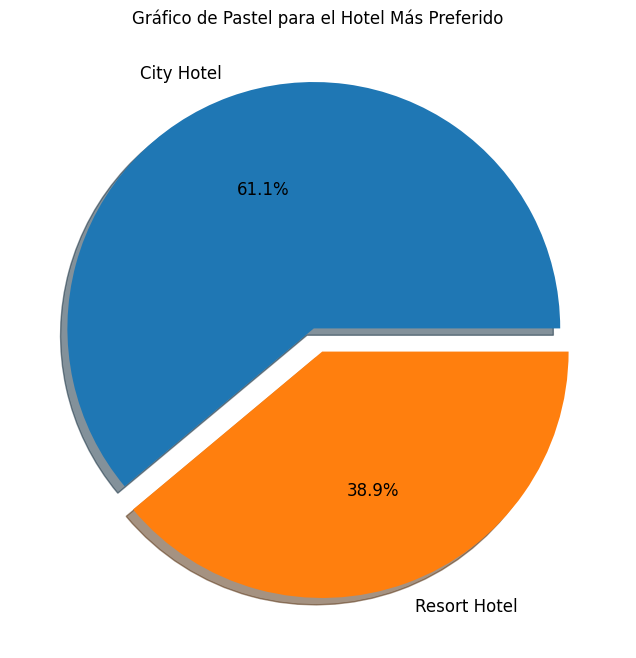

In [33]:
# Gráfico de pastel para visualizar la distribución de los hoteles preferidos
plt.figure(figsize=(10, 8))
hotel_df['hotel'].value_counts().plot.pie(explode=[0.05, 0.05], autopct='%1.1f%%', shadow=True, fontsize=12)
plt.title('Gráfico de Pastel para el Hotel Más Preferido')
plt.ylabel('')
plt.show()

#### 1. ¿Por qué elegiste el gráfico específico?


Un gráfico de pastel expresa una relación de parte a todo en tus datos. Es fácil explicar la comparación porcentual a través del área cubierta en un círculo con diferentes colores. Cuando la comparación de diferentes porcentajes entra en acción, se utiliza frecuentemente el gráfico de pastel. Por lo tanto, utilicé un gráfico de pastel, lo que me ayudó a obtener la comparación porcentual de la variable de características.

#### 2. ¿Cuál(es) es/son la(s) perspectiva(s) encontrada(s) a partir del gráfico?

Los hoteles de ciudad son el tipo de hotel más preferido por los huéspedes. Podemos decir que el hotel de ciudad es el hotel más concurrido.

#### 3. ¿Las perspectivas obtenidas ayudarán a crear un impacto positivo en el negocio?
¿Hay alguna perspectiva que lleve a un crecimiento negativo? Justifique con razones específicas.

Sí, las perspectivas obtenidas pueden ayudar a crear un impacto positivo en los negocios de reservas de hoteles de ciudad o resort, ya que se pueden utilizar para identificar las preferencias de los clientes y las tendencias en la industria hotelera. Por ejemplo, estas perspectivas podrían ayudar a los hoteles a identificar los momentos pico de reserva y optimizar sus esfuerzos de marketing, o podrían utilizarse para ofrecer descuentos y paquetes personalizados a clientes específicos.

No, no hay perspectivas que conduzcan a un crecimiento negativo. Las perspectivas obtenidas del análisis de datos pueden ayudar a las empresas a tomar decisiones informadas y brindar mejores experiencias a los clientes. Siempre que los datos se utilicen de manera responsable, las perspectivas solo deberían tener un impacto positivo en el negocio.

### Qué agente realizó la mayoría de las reservas?

In [34]:
# Return highest bookings made by agents
highest_bookings = hotel_df.groupby(['agent']).size().reset_index(name='Most_Bookings').sort_values(by='Most_Bookings', ascending=False)

# As agent 0 was a NaN value and we replaced it with 0, indicating no bookings, we drop it.
highest_bookings = highest_bookings[highest_bookings['agent'] != 0]

# Taking the top 10 bookings made by agents
top_ten_highest_bookings = highest_bookings.head(10)
top_ten_highest_bookings

,agent,Most_Bookings
9,9,28721
174,240,13028
14,14,3342
7,7,3294
183,250,2779
175,241,1644
27,28,1493
8,8,1383
1,1,1228
6,6,1117


Text(0.5, 1.0, 'Most Bookings Made by the agent')

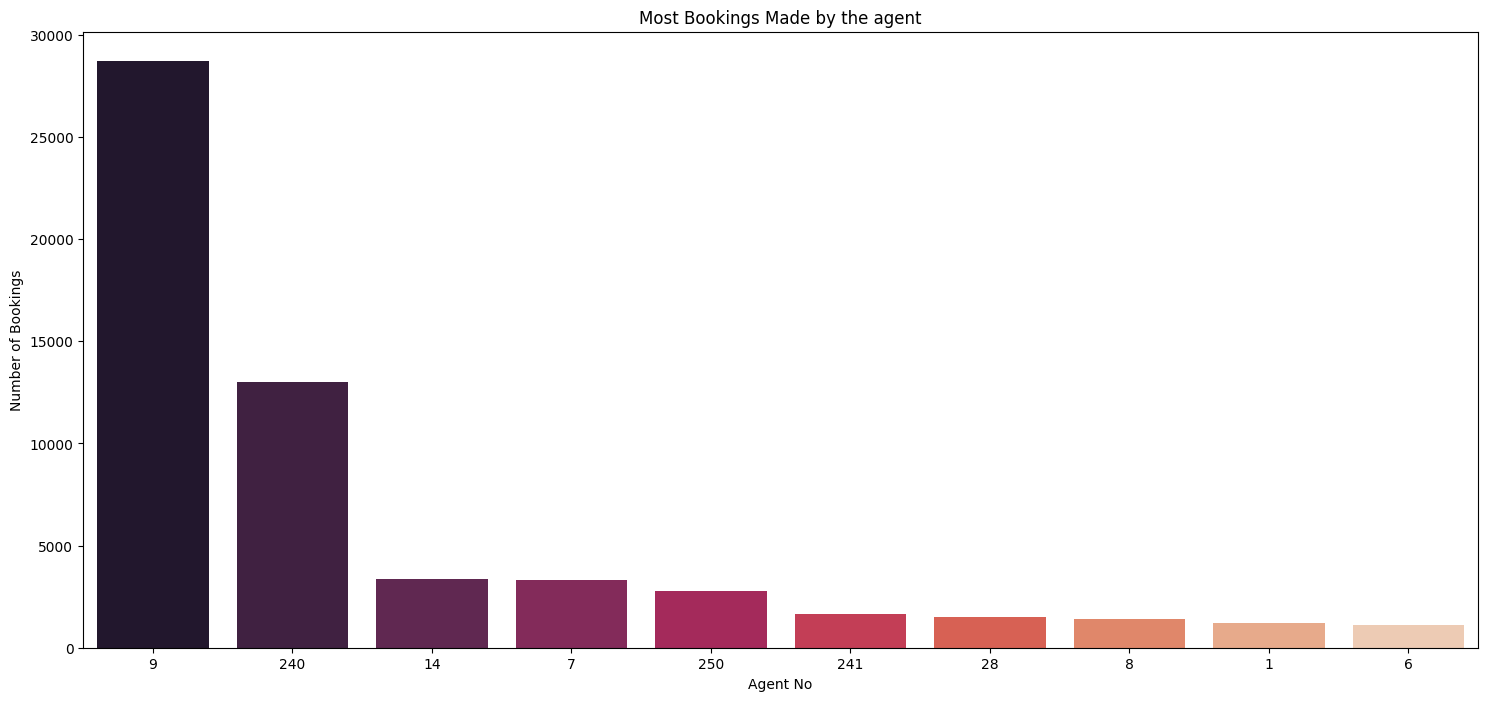

In [35]:
# Visualizsing by bar chart.
plt.figure(figsize = (18,8))
sns.barplot(x = top_ten_highest_bookings['agent'], y = top_ten_highest_bookings['Most_Bookings'], order = top_ten_highest_bookings['agent'], palette = 'rocket')
plt.xlabel('Agent No')
plt.ylabel('Number of Bookings')
plt.title("Most Bookings Made by the agent")

#### 1. Por qué elegiste este gráfico específico?

Los gráficos de barras muestran las frecuencias de los valores para los diferentes niveles de una variable categórica o nominal. A veces, los gráficos de barras también muestran otras estadísticas, como porcentajes.

Para mostrar el recuento de la mayoría de las reservas realizadas por el agente, he utilizado un gráfico de barras.

#### 2. ¿Cuál(es) son la(s) percepción(es) encontrada(s) en el gráfico?

El agente con el número de identificación 9 realizó la mayoría de las reservas de hotel.

#### 3. ¿Las percepciones obtenidas ayudarán a crear un impacto empresarial positivo? 
¿Existen percepciones que lleven a un crecimiento negativo? Justifica con razones específicas.

Sí, las percepciones obtenidas pueden ayudar a crear un impacto empresarial positivo en la mayoría de las reservas de hotel realizadas por el agente. Por ejemplo, las percepciones podrían revelar ciertos patrones de reserva o preferencias de los clientes que el agente puede capitalizar, como ofrecer descuentos o paquetes especiales a ciertos clientes. Además, las percepciones también podrían proporcionar al agente información valiosa sobre los hoteles más populares en una determinada área, lo que le permitiría tomar decisiones mejor informadas al reservar hoteles.

Sin embargo, también podría haber percepciones que conduzcan a un crecimiento negativo. Por ejemplo, si las percepciones revelan que los clientes están reservando consistentemente los mismos hoteles o no están aprovechando los descuentos o paquetes que se ofrecen, esto podría llevar a una disminución en los ingresos para el agente. Además, si las percepciones revelan que solo un número limitado de clientes están reservando hoteles, esto también podría llevar a una disminución en los ingresos.

### Cuál es el porcentaje de huéspedes repetidos?

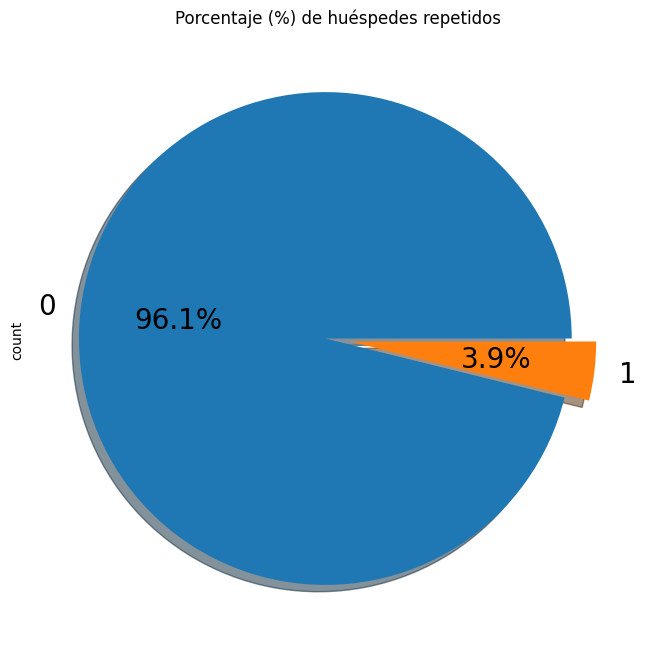

In [36]:
# Visualización mediante gráfico de torta.
hotel_df['is_repeated_guest'].value_counts().plot.pie(explode=[0.05, 0.05], autopct='%1.1f%%', shadow=True, figsize=(10, 8), fontsize=20)
plt.title("Porcentaje (%) de huéspedes repetidos")
plt.show()

#### 1. ¿Por qué elegiste este gráfico específico?


Un gráfico de torta expresa una relación parte-total en tus datos. Es fácil explicar la comparación de porcentajes a través del área cubierta en un círculo con diferentes colores. Cuando se trata de comparaciones de porcentajes diferentes, el gráfico de torta se utiliza con frecuencia. Por lo tanto, utilicé un gráfico de torta que me ayudó a obtener la comparación porcentual de la variable característica o objetivo.

#### 2. ¿Cuál(es) es/son la(s) idea(s) obtenida(s) del gráfico?

Solo el 3.9% de las personas revisitaron los hoteles. El 96.1% restante eran nuevos huéspedes. Por lo tanto, la tasa de retención es baja. Para retener a los huéspedes, la gerencia debería obtener comentarios de los huéspedes y tratar de mejorar los servicios.

#### 3. ¿Las ideas obtenidas ayudarán a crear un impacto comercial positivo?
¿Hay ideas que conduzcan a un crecimiento negativo? Justifica con razones específicas.

Sí, las ideas obtenidas pueden ayudar a crear un impacto comercial positivo en los huéspedes recurrentes para las reservas de hotel. Por ejemplo, las ideas se pueden utilizar para identificar patrones en el comportamiento de reserva, las preferencias del cliente y la lealtad. Esto luego se puede utilizar para adaptar promociones, descuentos y ofertas para atraer a los clientes que regresan y mejorar la lealtad del cliente. Además, las ideas se pueden utilizar para desarrollar estrategias de servicio al cliente para garantizar una experiencia positiva para el cliente y ayudar a retener a los clientes.

No, no hay ideas que conduzcan a un crecimiento negativo. Las ideas obtenidas al analizar los datos de los clientes solo se pueden utilizar para crear un impacto comercial positivo en las reservas de hotel. Los datos pueden ayudar a identificar las preferencias del cliente y desarrollar estrategias para servirlos mejor, lo que lleva a una mayor lealtad del cliente y un aumento en los ingresos.

### Cuál es el porcentaje de cancelación?

Text(0.5, 1.0, 'Cancelación y No Cancelación')

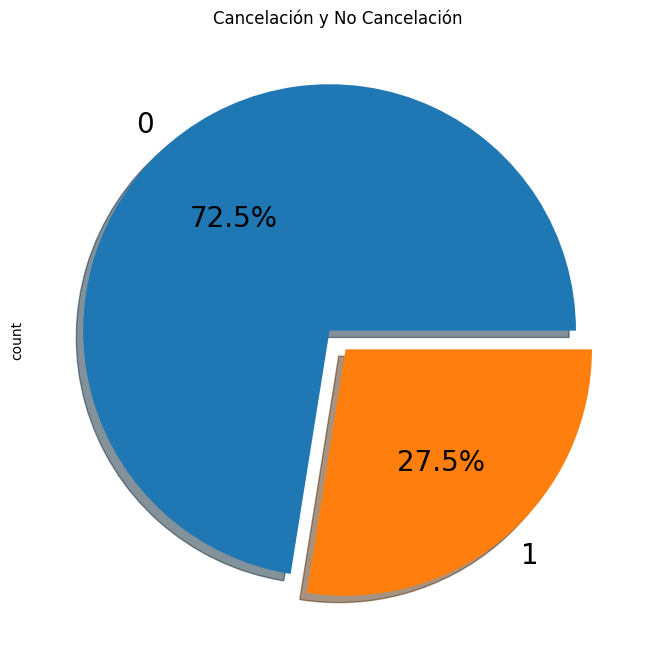

In [37]:
# Visualización mediante gráfico circular (pie chart).
hotel_df['is_canceled'].value_counts().plot.pie(explode=[0.05, 0.05], autopct='%1.1f%%', shadow=True, figsize=(10, 8), fontsize=20)
plt.title("Cancelación y No Cancelación")

#### 1. ¿Por qué elegiste este gráfico específico?

Un gráfico circular (pie chart) expresa una relación de parte a todo en tus datos. Es fácil de explicar la comparación de porcentajes a través del área cubierta en un círculo con diferentes colores. Cuando se trata de comparaciones de porcentaje diferentes, se utiliza frecuentemente el gráfico circular. Por lo tanto, utilicé un gráfico circular, lo cual me ayudó a obtener la comparación porcentual de la variable objetivo.

#### 2. ¿Cuál(es) es/son la(s) percepción(es) encontrada(s) del gráfico?

0 = no cancelado\
1 = cancelado\
El 27.5% de las reservas fueron canceladas de todas las reservas realizadas.

#### 3. ¿Las percepciones obtenidas ayudarán a crear un impacto comercial positivo? 
¿Hay alguna percepción que conduzca a un crecimiento negativo? Justifica con una razón específica.

Las percepciones obtenidas definitivamente pueden ayudar a crear un impacto comercial positivo en la cancelación de reservas de hotel. Por ejemplo, las percepciones podrían revelar que ciertos segmentos de clientes son más propensos a cancelar sus reservas y que ciertas políticas de reserva son más propensas a resultar en cancelaciones. Esta información luego puede utilizarse para desarrollar políticas de reserva más efectivas y para dirigir campañas de marketing a los segmentos de clientes que son más propensos a cancelar.

Sin embargo, también es posible que las percepciones lleven a un crecimiento negativo. Por ejemplo, si las percepciones sugieren que los clientes están cancelando reservas debido a precios más altos, entonces el hotel podría tener que reducir sus precios para reducir las cancelaciones, lo que podría llevar a menores ganancias.


### Cuál es la distribución porcentual de los espacios de estacionamiento requeridos?

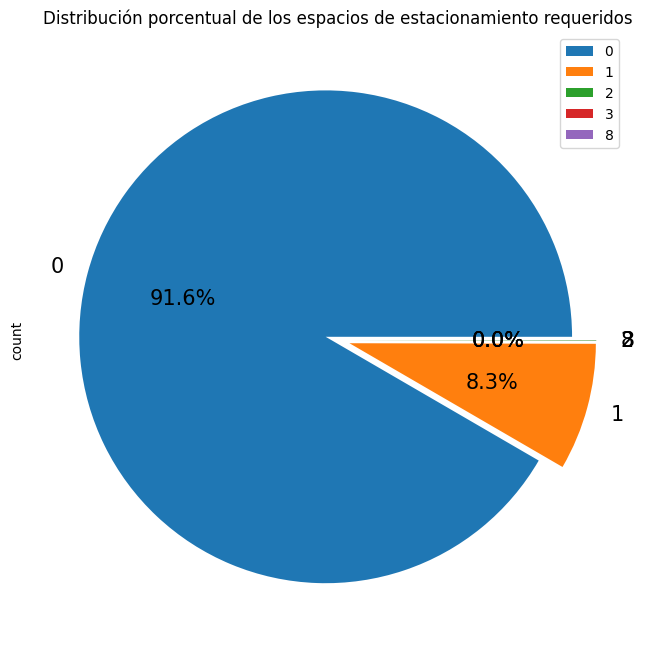

In [38]:
# Visualización mediante gráfico de pastel.
hotel_df['required_car_parking_spaces'].value_counts().plot.pie(explode=[0.05] * 5, autopct='%1.1f%%', shadow=False, figsize=(12, 8), fontsize=15)

# Etiquetas personalizadas para las categorías
labels = hotel_df['required_car_parking_spaces'].value_counts().index

# Título del gráfico
plt.title('Distribución porcentual de los espacios de estacionamiento requeridos')

# Leyenda personalizada para las etiquetas
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels)


#### 1. ¿Por qué elegiste este gráfico en particular?

Un gráfico de pastel expresa una relación de parte a todo en tus datos. Es fácil explicar la comparación de porcentajes a través del área cubierta en un círculo con diferentes colores. Cuando se trata de diferentes comparaciones de porcentajes, el gráfico de pastel se usa con frecuencia. Por lo tanto, utilicé el gráfico de pastel, lo que me ayudó a obtener la comparación de porcentajes de la variable de características o objetivo.

#### 2. ¿Cuál es/son la(s) percepción(es) encontrada(s) en el gráfico?

El 91.6% de los huéspedes no requirió espacio de estacionamiento. Solo el 8.3% de los huéspedes requirieron solo 1 espacio de estacionamiento.

#### 3. ¿Las percepciones obtenidas ayudarán a crear un impacto comercial positivo?
¿Hay alguna percepción que conduzca a un crecimiento negativo? Justifique con razones específicas.

Sí, las percepciones obtenidas pueden ayudar a crear un impacto comercial positivo en los espacios de estacionamiento requeridos para las reservas de hoteles. Percepciones como el número de autos asociados con cada reserva, el tipo de autos asociados con cada reserva y la duración del estacionamiento pueden ayudar al hotel a planificar mejor los espacios de estacionamiento necesarios para cada reserva. Esto puede ayudar al hotel a proyectar mejor sus necesidades de estacionamiento y asegurarse de que siempre tengan suficientes espacios para satisfacer la cantidad de reservas que reciben.

No, no hay percepciones que conduzcan a un crecimiento negativo. Todas las percepciones obtenidas de los datos pueden ayudar al hotel a planificar mejor sus necesidades de estacionamiento y asegurarse de que siempre tengan suficientes espacios para satisfacer sus reservas.

### Cuál es la distribución porcentual del "Customer Type"?

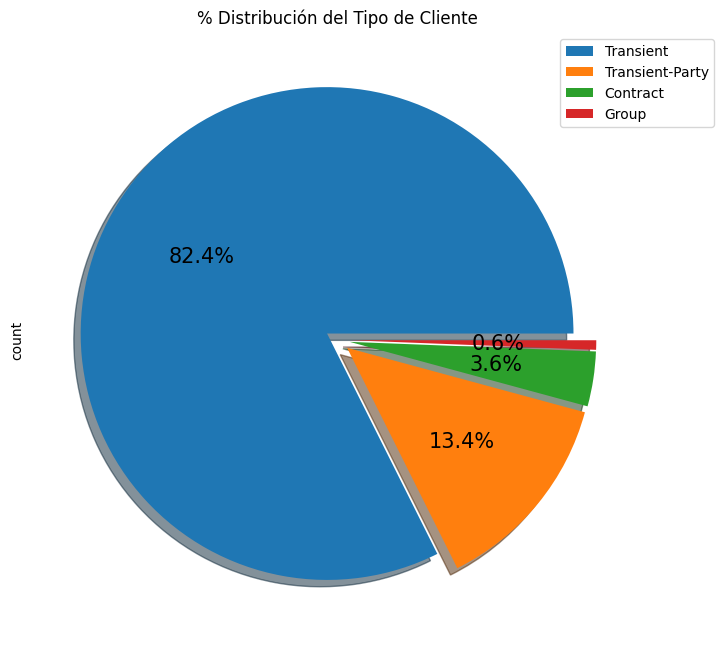

In [39]:
# Visualización mediante gráfico circular.
hotel_df['customer_type'].value_counts().plot.pie(explode=[0.05] * 4, shadow=True, autopct='%1.1f%%', figsize=(12, 8), fontsize=15, labels=None)

labels = hotel_df['customer_type'].value_counts().index.tolist()
plt.title('% Distribución del Tipo de Cliente')
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels)


#### 1. ¿Por qué eligió este gráfico específico?

Un gráfico circular expresa una relación de parte a todo en sus datos. Es fácil explicar la comparación de porcentajes a través del área cubierta en un círculo con diferentes colores. Cuando se trata de comparación de diferentes porcentajes, se utiliza frecuentemente el gráfico circular. Por lo tanto, utilicé un gráfico circular, lo que me ayudó a obtener la comparación de porcentajes de la variable característica o objetivo.

#### 2. ¿Cuál es/son las percepción(es) encontrada(s) del gráfico?

La mayoría de los clientes/huéspedes eran del tipo Transitorio (82.4%) y el grupo transitorio era del 13.4% y el 0.6% pertenecía al grupo y los huéspedes restantes pertenecían al tipo de contrato.

Contrato:
Cuando la reserva tiene una asignación u otro tipo de contrato asociado a ella.

Grupo:
Cuando la reserva está asociada a un grupo.

Transitorio:
Cuando la reserva no es parte de un grupo o contrato, y no está asociada a otras reservas transitorias.

Grupo transitorio:
Cuando la reserva es transitoria, pero está asociada a al menos otra reserva transitoria.

El tipo de cliente Transitorio es mayor, con un 82.4%. El porcentaje de reservas asociadas al Grupo es muy bajo.

#### 3. ¿Las percepciones obtenidas ayudarán a crear un impacto empresarial positivo?
¿Existen percepciones que conduzcan a un crecimiento negativo? Justifique con razones específicas.

Sí, las percepciones obtenidas pueden ayudar a crear un impacto empresarial positivo en el tipo de cliente para las reservas de hotel. Las percepciones pueden ayudar a identificar los tipos de clientes populares, determinar qué tipos de clientes están generando más ingresos y qué tipos de clientes son los más leales. Esta información puede utilizarse para dirigirse a los tipos de clientes adecuados y adaptar los servicios del hotel y las campañas de marketing para satisfacer mejor sus necesidades. Además, las percepciones pueden ayudar a identificar áreas de mejora, como áreas donde no se están dirigendo ciertos tipos de clientes o donde el servicio al cliente podría mejorarse.

Sin embargo, también hay posibles impactos negativos de las percepciones. Por ejemplo, si un hotel se dirige demasiado a un cierto tipo de cliente, podría provocar una saturación de ese tipo de cliente y llevar a una disminución de los beneficios. Además, concentrarse demasiado en un tipo de cliente podría llevar a descuidar otros tipos de clientes y podría provocar una disminución en la fidelidad general del cliente.

### Cuál es el porcentaje de cambios de reserva realizados por el cliente?

In [141]:
hotel_df['booking_changes'].value_counts().reset_index()

,booking_changes,count
0,0,71425
1,1,10868
2,2,3483
3,3,862
4,4,347
5,5,113
6,6,57
7,7,29
8,8,14
9,9,8


Text(0, 0.5, 'Porcentaje(%)')

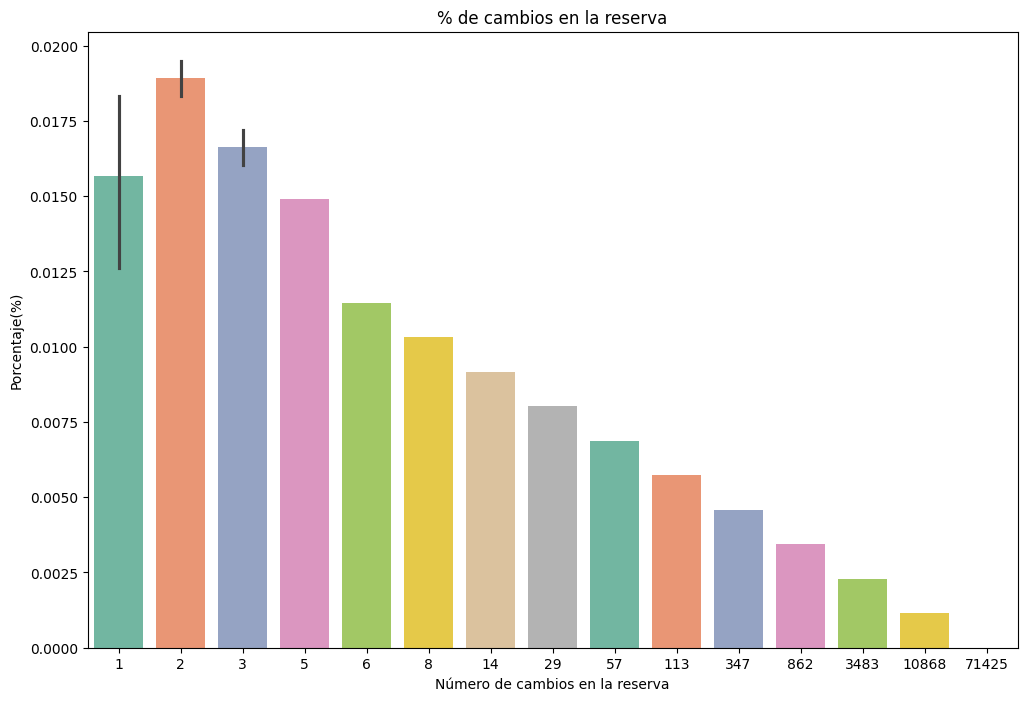

In [144]:
# Visualización mediante gráfico de barras.
booking_changes_df = hotel_df['booking_changes'].value_counts().reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(x=booking_changes_df['count'], y=booking_changes_df['booking_changes'] * 100 / hotel_df.shape[0], palette='Set2')
plt.title("% de cambios en la reserva")
plt.xlabel('Número de cambios en la reserva')
plt.ylabel('Porcentaje(%)')

#### 1. ¿Por qué eligió este gráfico específico?

Los gráficos de barras muestran las frecuencias de valores para los diferentes niveles de una variable categórica o nominal. A veces, los gráficos de barras muestran otras estadísticas, como porcentajes.
 
Para mostrar el recuento de la mayoría de las reservas realizadas por el agente, es por eso que he utilizado un gráfico de barras.

#### 2. ¿Cuál/es es/son la/s idea/s encontrada/s en el gráfico?

Casi el 82% de las reservas no fueron modificadas por los huéspedes.

#### 3. ¿Los conocimientos adquiridos ayudarán a crear un impacto comercial positivo?
¿Existen ideas que conduzcan a un crecimiento negativo? Justifique con una razón específica.

Sí, los conocimientos adquiridos pueden ayudar a crear un impacto comercial positivo en los cambios de reserva realizados por el cliente para las reservas de hotel. Por ejemplo, los conocimientos pueden utilizarse para comprender mejor las preferencias del cliente y hacer predicciones más precisas sobre el comportamiento del cliente, lo que puede llevar a estrategias de marketing más eficientes y una mayor satisfacción del cliente. Además, los conocimientos pueden utilizarse para identificar las necesidades del cliente y hacer recomendaciones que alienten a los clientes a realizar más cambios en sus reservas existentes.

Sin embargo, existe la posibilidad de que los conocimientos conduzcan a un crecimiento negativo, especialmente si se interpretan de manera incorrecta o se utilizan de manera inapropiada. Por ejemplo, si los conocimientos se utilizan para crear estrategias de marketing demasiado agresivas o para dirigirse a los clientes con ofertas irrelevantes o intrusivas, esto podría llevar a la insatisfacción del cliente y hacer que los clientes eviten realizar cambios en sus reservas por completo.

### Qué tipo de comida es la más preferida por los huéspedes?

Text(0.5, 1.0, 'Preferred Meal Type')

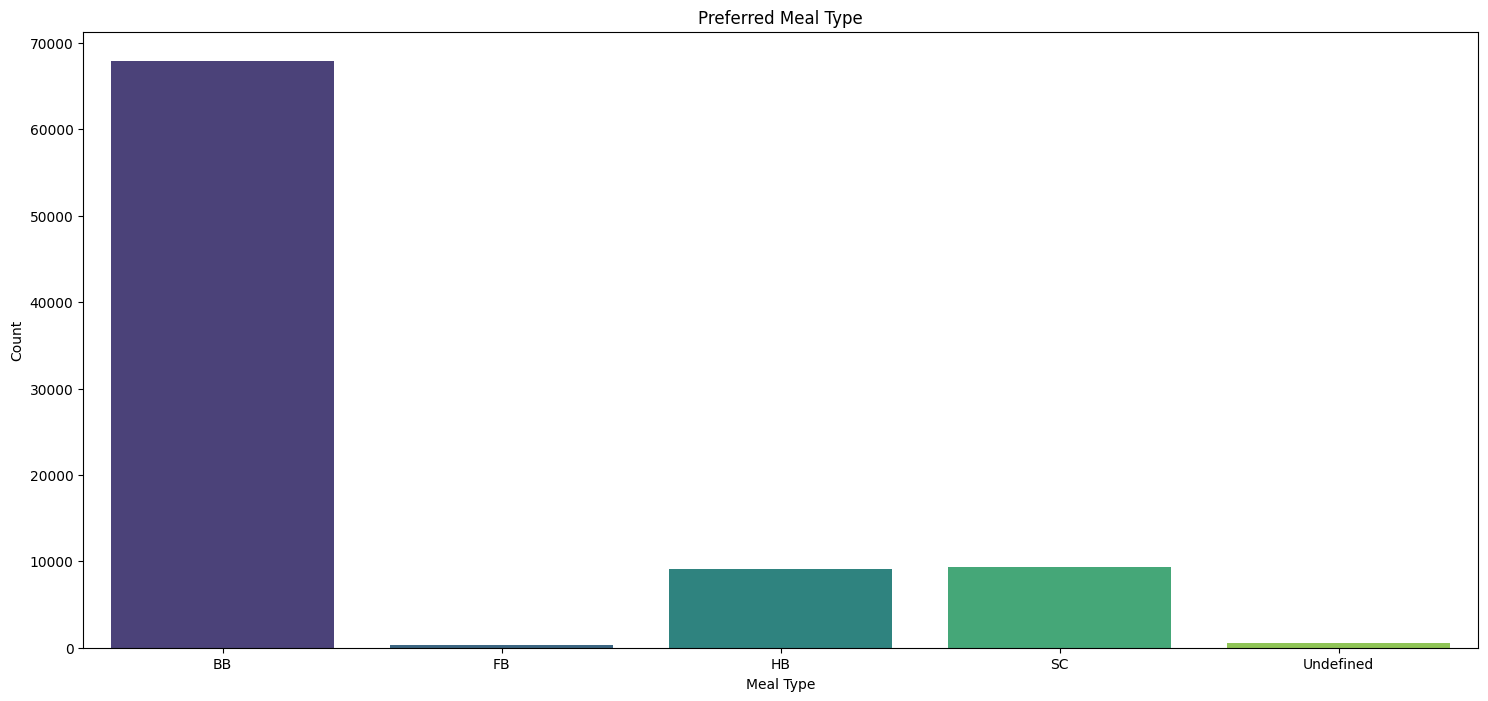

In [70]:
# Visualización mediante gráfico de barras.
plt.figure(figsize = (18,8))
sns.countplot(x = hotel_df['meal'], palette = 'viridis')
plt.xlabel('Meal Type')
plt.ylabel('Count')
plt.title("Preferred Meal Type")

#### 1. ¿Por qué elegiste el gráfico específico?

El countplot se utiliza para representar la ocurrencia (conteo) de la observación presente en la variable categórica y se usa para mostrar los conteos de observaciones en cada categoría categórica mediante barras.

#### 2. ¿Cuáles son las percepciones encontradas a partir del gráfico?


Tipos de comidas en hoteles:

1.   BB - (Bed and Breakfast)
2.   HB- (Half Board)
3.   FB- (Full Board)
4.   SC- (Self Catering)

Por lo tanto, el tipo de comida más preferido por los huéspedes es BB (Cama y Desayuno). HB (Media Pensión) y SC (Autoabastecimiento) son igualmente preferidos.

#### 3. ¿Las percepciones obtenidas ayudarán a crear un impacto comercial positivo? 
¿Hay alguna percepción que conduzca a un crecimiento negativo? Justifica con una razón específica.

Sí, las percepciones obtenidas pueden ayudar a crear un impacto comercial positivo sobre qué tipo de comida es mayormente preferida por los huéspedes para reservas de hotel. Con las percepciones obtenidas, los hoteles podrían usar los datos para identificar qué tipos de comida son más populares entre sus huéspedes para que puedan ajustar su oferta de menú o precios para satisfacer mejor las necesidades de sus clientes.

Sin embargo, también existen posibles impactos negativos de las percepciones. Por ejemplo, si los datos muestran que ciertos tipos de comida son impopulares, el hotel podría optar por discontinuar esos artículos de su menú, lo que podría llevar a una disminución en la satisfacción del cliente. Además, si los datos muestran que ciertos tipos de comida son más caros que otros, el hotel podría optar por aumentar los precios de esos artículos, lo que podría llevar a una disminución en el gasto del cliente.

### Cuál es la distribución porcentual del tipo de depósito?

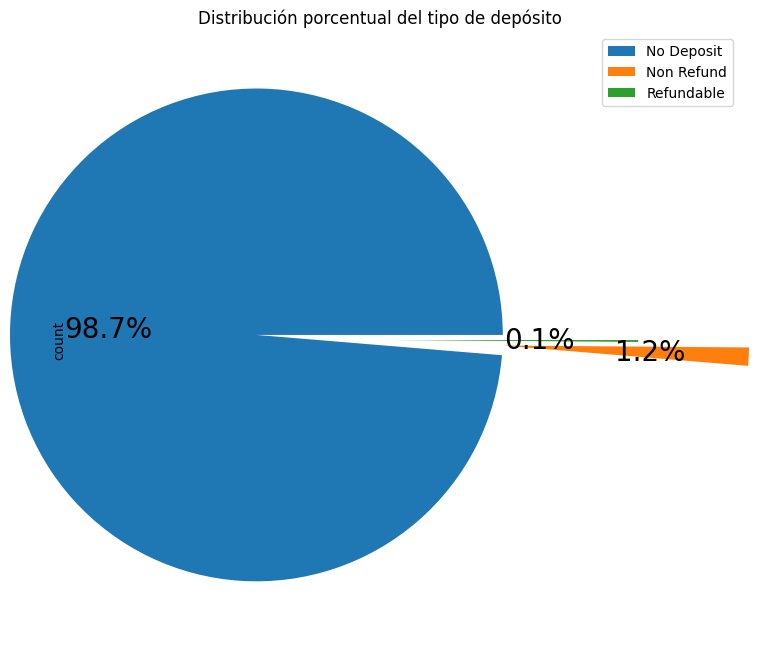

In [71]:
# Visualización mediante gráfico de pastel.
hotel_df['deposit_type'].value_counts().plot.pie(explode=(0.5, 0.5, 0.05), autopct='%1.1f%%', shadow=False, figsize=(14, 8), fontsize=20, labels=None)
plt.title("Distribución porcentual del tipo de depósito")
labels = hotel_df['deposit_type'].value_counts().index.tolist()
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels)

#### 1. ¿Por qué elegiste este gráfico en particular?

Un gráfico circular expresa una relación de parte a todo en tus datos. Es fácil explicar la comparación de porcentajes a través del área cubierta en un círculo con diferentes colores. Cuando se trata de comparaciones de porcentajes diferentes, el gráfico circular se utiliza con frecuencia. Por lo tanto, utilicé un gráfico circular, lo que me ayudó a obtener la comparación de porcentajes de la variable de interés o de destino.

#### 2. ¿Cuál es/son la(s) idea(s) encontrada(s) en el gráfico?

El 98.7 % de los huéspedes prefieren el tipo de depósito "No deposit".

#### 3. ¿Las ideas obtenidas ayudarán a crear un impacto comercial positivo?
¿Existen ideas que conduzcan a un crecimiento negativo? Justifica con razones específicas.

Sí, las ideas obtenidas pueden ayudar a crear un impacto comercial positivo en el tipo de depósito para las reservas de hotel. Por ejemplo, las ideas sobre las preferencias de los clientes por un tipo de depósito particular pueden llevar a un aumento en los ingresos, ya que es más probable que los clientes reserven un hotel si ofrece un tipo de depósito que prefieren. Además, las ideas sobre las preferencias de los clientes por períodos de depósito más largos también pueden llevar a un aumento en los ingresos, ya que es más probable que los clientes reserven un hotel por períodos más largos si se les ofrece un período de depósito más largo.

Sin embargo, también puede haber ideas que conduzcan a un crecimiento negativo. Por ejemplo, las ideas sobre las preferencias de los clientes por períodos de depósito más cortos pueden llevar a una disminución en los ingresos, ya que es más probable que los clientes reserven un hotel por períodos más cortos si se les ofrece un período de depósito más corto. Además, las ideas sobre las preferencias de los clientes por un tipo de depósito en particular pueden llevar a una disminución en los ingresos, ya que es menos probable que los clientes reserven un hotel si no ofrece el tipo de depósito que prefieren.

### Cuál es el tipo de habitación más preferido por los clientes?

Text(0.5, 1.0, 'Tipo de Habitación más Preferido')

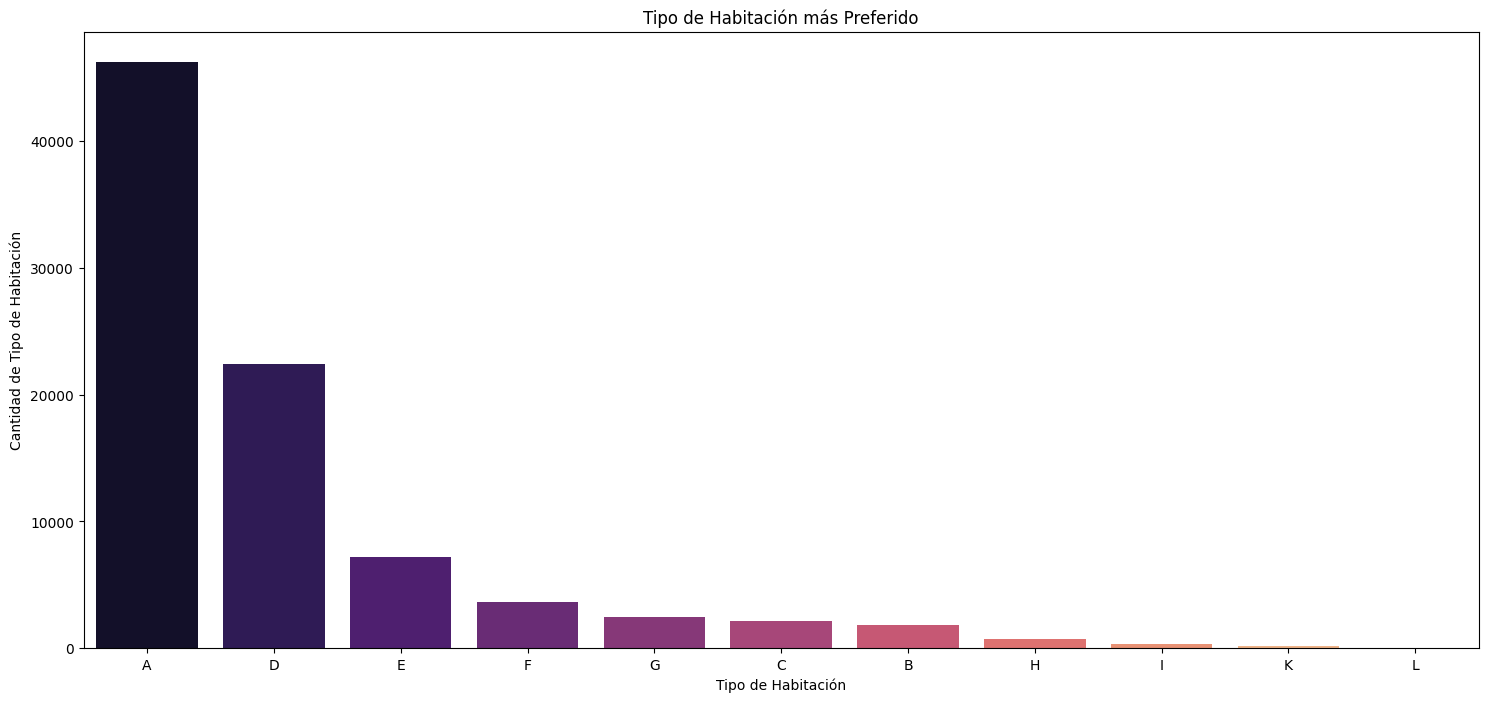

In [72]:
# Establecer el tamaño del gráfico
plt.figure(figsize=(18, 8))

# Graficar
sns.countplot(x=hotel_df['assigned_room_type'], order=hotel_df['assigned_room_type'].value_counts().index, palette='magma')

# Establecer etiqueta en el eje x del gráfico
plt.xlabel('Tipo de Habitación')

# Establecer etiqueta en el eje y del gráfico
plt.ylabel('Cantidad de Tipo de Habitación')

# Establecer título del gráfico
plt.title("Tipo de Habitación más Preferido")

#### 1. ¿Por qué elegiste este gráfico específico?

El countplot se utiliza para representar la ocurrencia (conteos) de la observación presente en la variable categórica y se utiliza para mostrar los conteos de observaciones en cada categoría mediante barras.

#### 2. ¿Cuál(es) es/son la(s) idea(s) encontrada(s) en el gráfico?

El tipo de habitación 'A' es el más preferido por los huéspedes y el segundo más preferido es 'D'.

#### 3. ¿Las ideas obtenidas ayudarán a crear un impacto comercial positivo? ¿Existen ideas que lleven a un crecimiento negativo? Justifica con razones específicas.

Sí, las ideas obtenidas pueden ayudar a crear un impacto comercial positivo sobre cuál es el tipo de habitación más preferido por los clientes para las reservas de hotel. Conocer el tipo de habitación más preferido por los clientes puede ayudar al hotel a asignar mejor sus recursos y enfocarse en áreas que probablemente atraigan más negocios. También puede ayudar al hotel a crear ofertas y promociones personalizadas que sean más propensas a ser aceptadas por el cliente.

No, no hay ideas que lleven a un crecimiento negativo. Las ideas obtenidas se centran en comprender las preferencias del cliente y ayudar al hotel a tomar decisiones más informadas sobre sus operaciones. Esto solo resultaría en un crecimiento más positivo para el hotel.

### De qué país vienen la mayoría de los invitados?

Text(0.5, 1.0, 'Número de huéspedes de diferentes países')

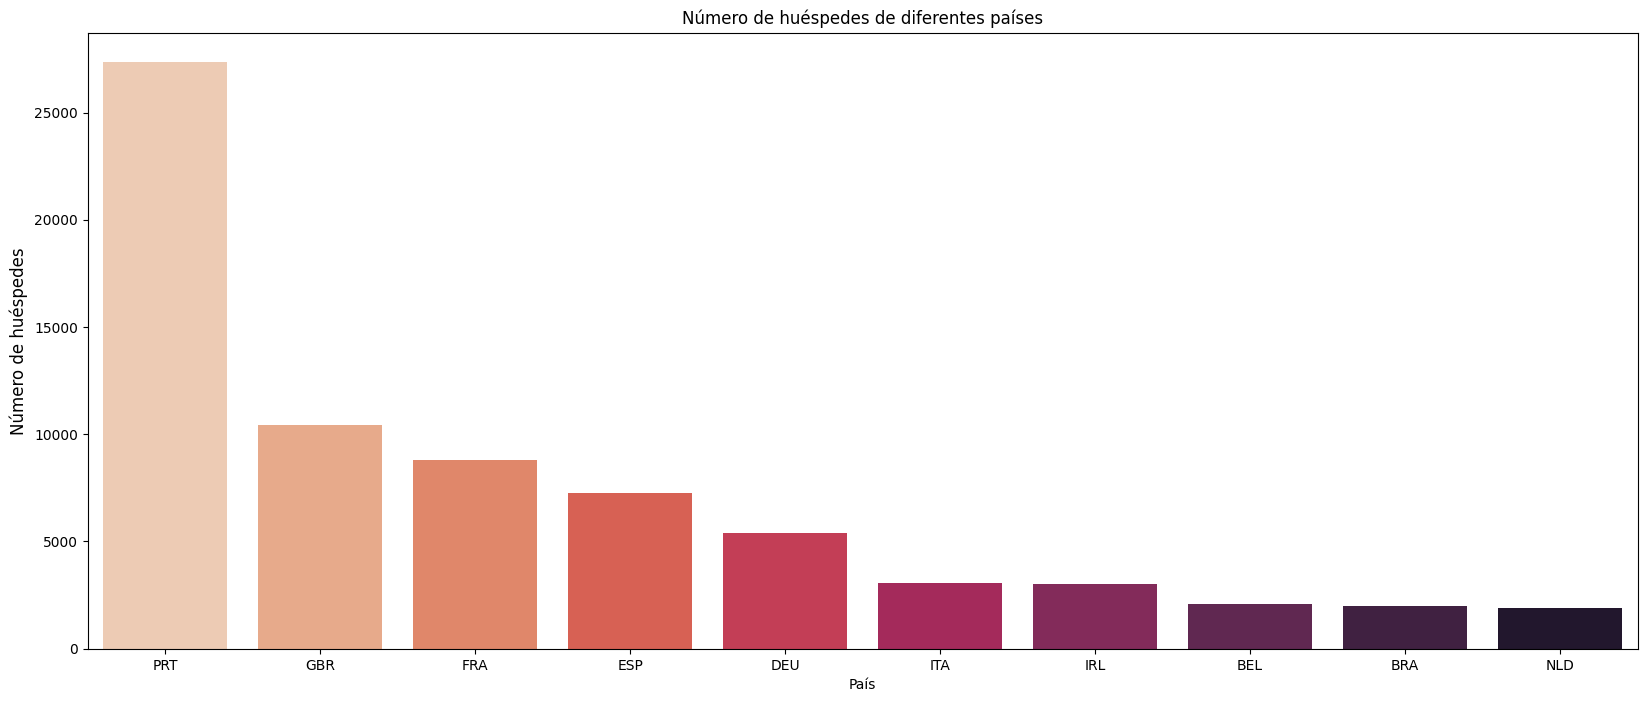

In [147]:
# Contando los huéspedes de varios países.
country_df = hotel_df['country'].value_counts().reset_index()[:10]

# Visualización mediante gráfico de barras.
plt.figure(figsize=(20,8))
sns.barplot(x=country_df['country'], y=country_df['count'], palette='rocket_r')
plt.xlabel('País')
plt.ylabel('Número de huéspedes', fontsize=12)
plt.title("Número de huéspedes de diferentes países")


In [80]:
import folium                          
import plotly.express as px

In [81]:
basemap = folium.Map()
guests_map = px.choropleth(country_df, locations = country_df['country'], color = country_df['count of guests'], hover_name = country_df['country'])
guests_map.show()

#### 1. ¿Por qué elegiste el gráfico específico?

Los gráficos de barras muestran las frecuencias de valores para los diferentes niveles de una variable categórica o nominal. A veces, los gráficos de barras muestran otras estadísticas, como porcentajes.

Para mostrar el recuento de la mayoría de las reservas realizadas por el agente, es por eso que he utilizado un gráfico de barras.

#### 2. ¿Cuál(es) es/son la(s) idea(s) encontrada(s) a partir del gráfico?

Abreviaturas para países:

1.   PRT- Portugal
2.   GBR- United Kingdom
3.   FRA- France
4.   ESP- Spain
5.   DEU - Germany
6.   ITA -Itlay
7.   IRL - Ireland
8.   BEL -Belgium
9.   BRA -Brazil
10.   NLD-Netherlands

La mayoría de los huéspedes vienen de Portugal, es decir, más de 25000 huéspedes son de Portugal. Después de Portugal, el Reino Unido, Francia y España son los países de donde provienen la mayoría de los huéspedes.

#### 3. ¿Las ideas obtenidas ayudarán a crear un impacto comercial positivo? ¿Hay ideas que conduzcan a un crecimiento negativo? Justifica con razones específicas.

Sí, las ideas obtenidas ayudarán a crear un impacto comercial positivo en el país del que provienen la mayoría de los huéspedes que reservan habitaciones de hotel. Al comprender de qué país provienen la mayoría de los huéspedes, un hotel puede adaptar sus servicios a las necesidades específicas de los huéspedes de ese país. Esto puede incluir proporcionar servicios y comodidades que prefieran los huéspedes de ese país, así como aumentar los esfuerzos de marketing en ese país para atraer aún más huéspedes.

No hay ideas que conduzcan a un crecimiento negativo. Las ideas simplemente proporcionan datos sobre de qué país proviene la mayoría de los huéspedes, y estos datos pueden usarse para tomar decisiones comerciales positivas.

### En qué mes ocurrieron la mayoría de las reservas?

In [154]:
# Agrupando por arrival_date_month y contando el número de hoteles
bookings_by_months_df = hotel_df.groupby(['arrival_date_month'])['hotel'].count().reset_index().rename(columns={'hotel': "Counts"})

# Creando una lista de meses en orden
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Creando un DataFrame que mapeará el orden de la lista de meses anterior sin cambiar sus valores.
bookings_by_months_df['arrival_date_month'] = pd.Categorical(bookings_by_months_df['arrival_date_month'], categories=months, ordered=True)

# Ordenando por arrival_date_month
bookings_by_months_df = bookings_by_months_df.sort_values('arrival_date_month')
bookings_by_months_df


,arrival_date_month,Counts
4,January,4685
3,February,6083
7,March,7489
0,April,7900
8,May,8344
6,June,7756
5,July,10043
1,August,11242
11,September,6682
10,October,6921


Text(0, 0.5, 'Number of bookings')

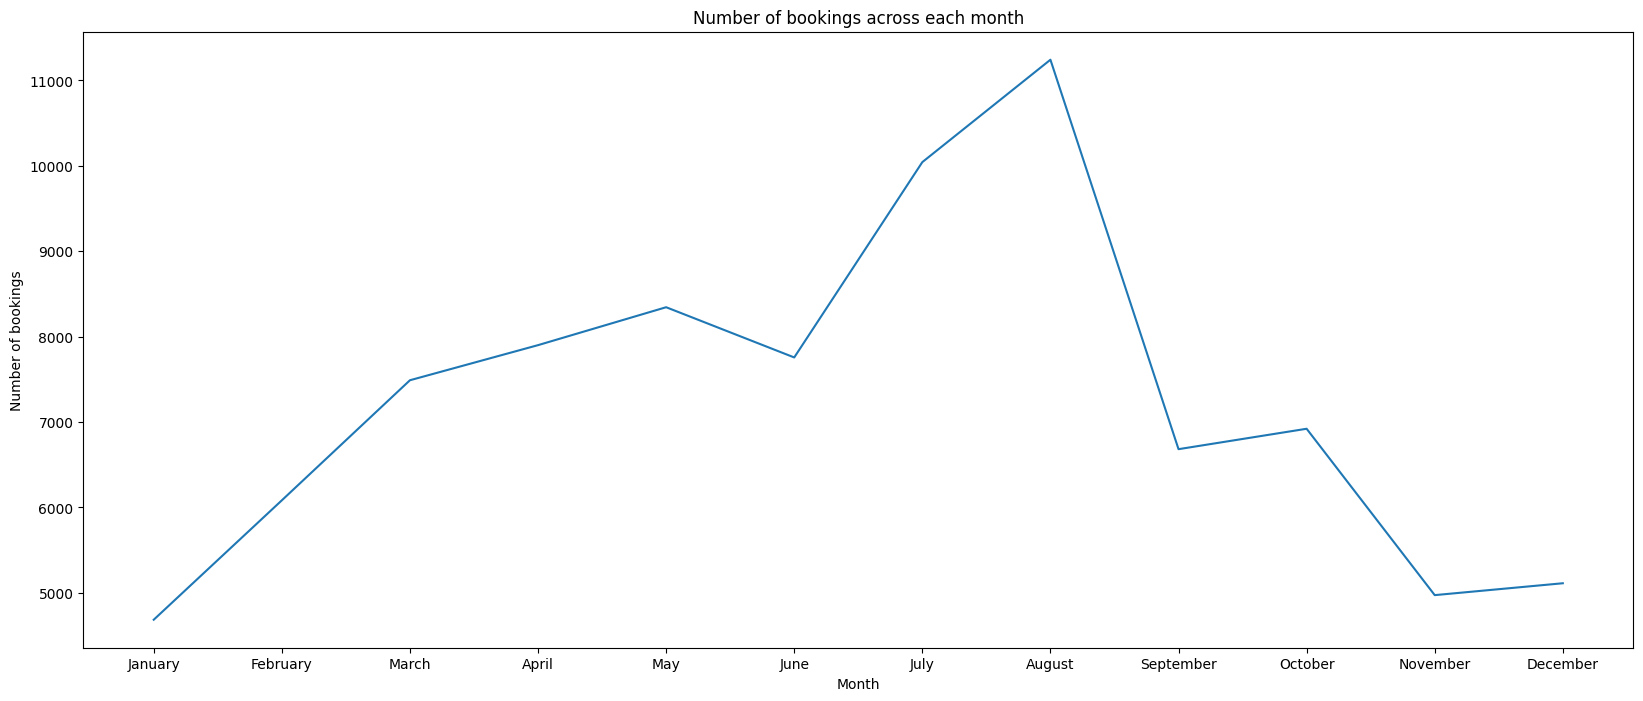

In [155]:
# Visualizsing by line plot.
# Set plot size
plt.figure(figsize = (20,8))

# Ploting lineplot on x- months & y- booking counts
sns.lineplot(x = bookings_by_months_df['arrival_date_month'], y = bookings_by_months_df['Counts'], palette = 'crest')
plt.title('Number of bookings across each month')
plt.xlabel('Month')
plt.ylabel('Number of bookings')

#### 1. ¿Por qué elegiste el gráfico específico?

Los gráficos de líneas de Seaborn representan la relación entre valores continuos y categóricos en un formato de punto de datos continuos. Los gráficos de líneas muestran valores numéricos en un eje y valores categóricos en el otro.

#### 2. ¿Cuál(es) es/son la(s) idea(s) encontrada(s) a partir del gráfico?

Como podemos ver en el gráfico de líneas, la mayoría de las reservas ocurren de junio a septiembre. El verano puede ser la razón principal de la mayor cantidad de reservas. Después de septiembre, las reservas comienzan a disminuir.

#### 3. ¿Las ideas obtenidas ayudarán a crear un impacto comercial positivo? 
¿Hay ideas que conduzcan a un crecimiento negativo? Justifica con razones específicas.

Sí, las ideas obtenidas pueden ayudar a crear un impacto comercial positivo sobre en qué mes ocurrieron la mayoría de las reservas de hotel. Por ejemplo, si los datos revelan que la mayoría de las reservas se realizan durante los meses de verano, el hotel puede crear descuentos y promociones especiales para atraer a más visitantes durante este período. Además, las ideas pueden ser utilizadas para dirigirse mejor a los clientes potenciales y ajustar las estrategias de marketing para aumentar las reservas totales.

No, no hay ideas que conduzcan a un crecimiento negativo. Las ideas obtenidas del análisis de datos solo proporcionan información sobre qué meses son los más populares para las reservas de hotel. Con esta información, el hotel puede ajustar su estrategia para maximizar el número de reservas.

### Qué año tuvo las reservas más altas?

Text(0.5, 1.0, 'Reservas por año')

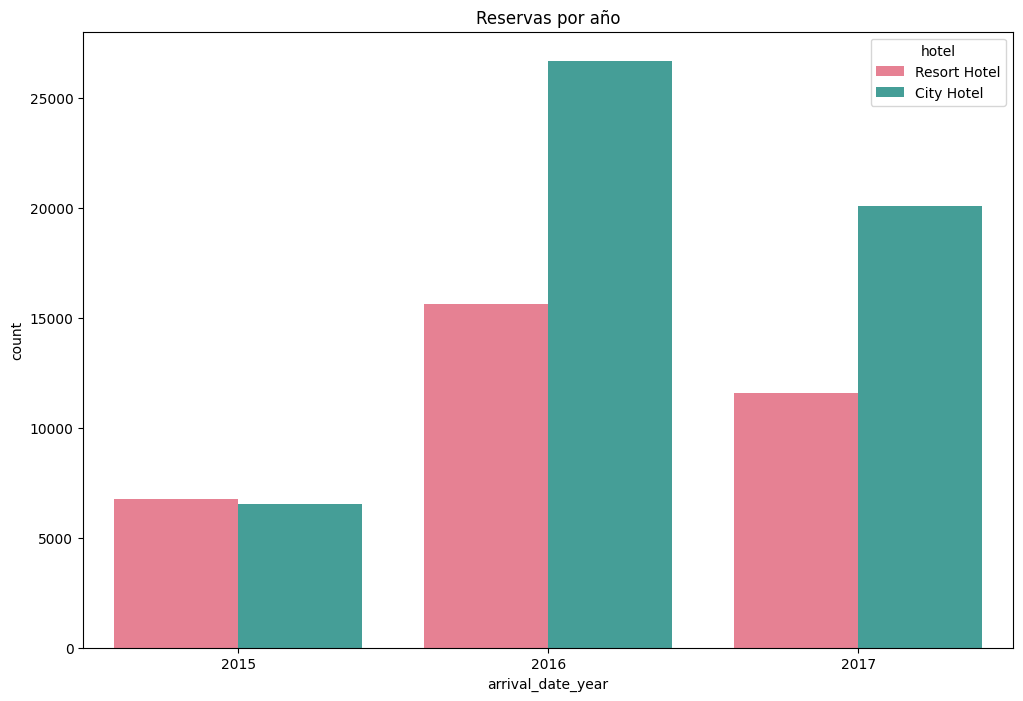

In [85]:
# Visualización mediante el gráfico de conteo.

# Establecer tamaño del gráfico
plt.figure(figsize=(12, 8))

# Gráfico con countplot
sns.countplot(x=hotel_df['arrival_date_year'], hue=hotel_df['hotel'], palette='husl')
plt.title("Reservas por año")

#### 1. ¿Por qué elegiste el gráfico específico?

El countplot se utiliza para representar la ocurrencia (conteos) de las observaciones presentes en la variable categórica y se utiliza para mostrar los conteos de observaciones en cada categoría categórica utilizando barras.

#### 2. ¿Cuál(es) es/son la(s) idea(s) encontrada(s) a partir del gráfico?

La mayoría de las reservas para hoteles de ciudad y hoteles resort ocurrieron en 2016. Como podemos ver, la mayoría de las reservas fueron para hoteles de ciudad.

- 2016 tuvo las reservas más altas.
- 2015 tuvo menos de 7000 reservas.
- En general, los hoteles de ciudad tuvieron la mayoría de las reservas.

#### 3. ¿Las ideas obtenidas ayudarán a crear un impacto comercial positivo? ¿Hay ideas que conduzcan a un crecimiento negativo? Justifica con razones específicas.

Sí, las ideas obtenidas pueden ayudar a crear un impacto comercial positivo sobre qué año tuvo las reservas hoteleras más altas. Por ejemplo, las ideas pueden revelar qué temporadas fueron las más ocupadas para las reservas, qué factores impulsaron las reservas más altas y qué estrategias fueron exitosas para aumentar las reservas. Al analizar estos datos, un hotel puede adaptar sus estrategias para maximizar las reservas en el futuro.

No, no hay ideas que conduzcan a un crecimiento negativo. Las ideas obtenidas se centran en comprender qué estrategias y factores llevaron a las reservas más altas, que es información que se puede utilizar para aumentar las reservas en el futuro.

### Qué canal de distribución se utiliza principalmente para las reservas de hotel?








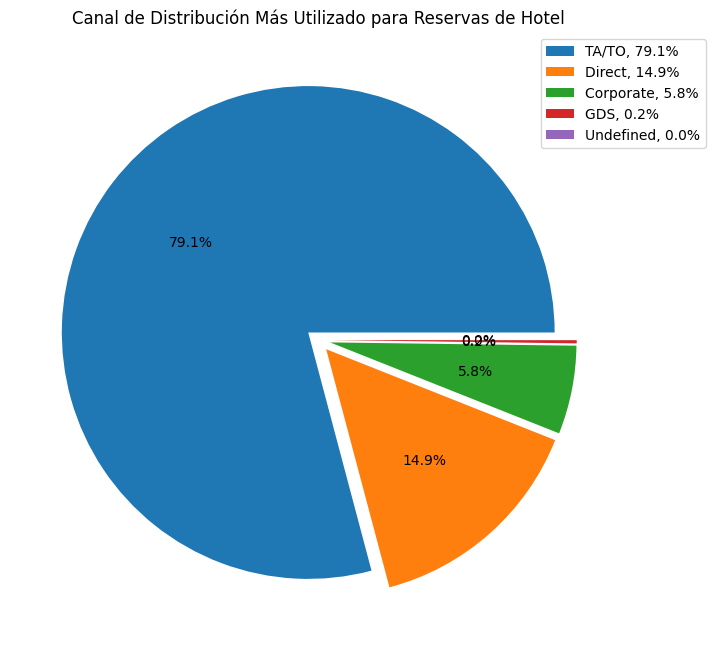

In [106]:
# Creando etiquetas
labels = hotel_df['distribution_channel'].value_counts().index.tolist()

# Creando un nuevo DataFrame para el canal de distribución
distribution_channel_df = hotel_df['distribution_channel'].value_counts().reset_index()

# Convirtiendo 'count' a tipo numérico
distribution_channel_df['count'] = distribution_channel_df['count'].astype(int)

# Añadiendo columnas de porcentaje al DataFrame
total_bookings = distribution_channel_df['count'].sum()
distribution_channel_df['percentage'] = round(distribution_channel_df['count'] * 100 / total_bookings, 1)

# Creando una lista de porcentajes
sizes = distribution_channel_df['percentage'].values.tolist()

# Graficando el gráfico de pastel
plt.figure(figsize=(15, 8))
plt.pie(distribution_channel_df['count'], explode=[0.05] * len(labels), labels=None, shadow=False, autopct='%1.1f%%', textprops={'fontsize': 10})
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=[f'{l}, {s}%' for l, s in zip(labels, sizes)])
plt.title('Canal de Distribución Más Utilizado para Reservas de Hotel')
plt.show()


#### 1. ¿Por qué elegiste el gráfico específico?

Un gráfico circular (pie chart) expresa una relación de parte a todo en tus datos. Es fácil explicar la comparación de porcentajes a través del área cubierta en un círculo con diferentes colores. Cuando se trata de comparaciones de porcentajes diferentes, el gráfico circular se utiliza con frecuencia. Por lo tanto, utilicé un gráfico circular que me ayudó a obtener la comparación de porcentajes de la variable característica o variable objetivo.

#### 2. ¿Cuál(es) es/son la(s) idea(s) encontrada(s) a partir del gráfico?

El 79.1% de las reservas se realizaron a través de TA/TO (agentes de viaje / operadores turísticos). El segundo canal de distribución más utilizado es directo.

#### 3. ¿Las ideas obtenidas ayudarán a crear un impacto comercial positivo? ¿Hay ideas que conduzcan a un crecimiento negativo? Justifica con razones específicas.

Las ideas obtenidas al analizar qué canal de distribución se utiliza principalmente para las reservas de hotel pueden ayudar a crear un impacto comercial positivo. Por ejemplo, si el análisis revela que los clientes prefieren reservar hoteles a través de un canal de distribución en particular, el negocio puede enfocar sus esfuerzos de marketing en ese canal para impulsar más reservas. Además, el negocio puede centrar sus esfuerzos en proporcionar a los clientes una mejor experiencia de reserva en el canal preferido para aumentar la satisfacción y la lealtad del cliente.

No necesariamente hay ideas que conduzcan a un crecimiento negativo. Es posible que el análisis revele que los clientes no están utilizando ciertos canales de distribución, en cuyo caso el negocio puede necesitar ajustar su estrategia para impulsar más reservas. Sin embargo, las ideas seguirían siendo positivas en el sentido de que ayudarían al negocio a identificar oportunidades de crecimiento.

### Análisis bivariado y multivariado:

In [107]:
grup_by_hotel = hotel_df.groupby('hotel')

### Qué hoteles tienen la mayor cantidad de huéspedes repetidos?

Text(0.5, 1.0, 'Huéspedes más repetidos para cada hotel')

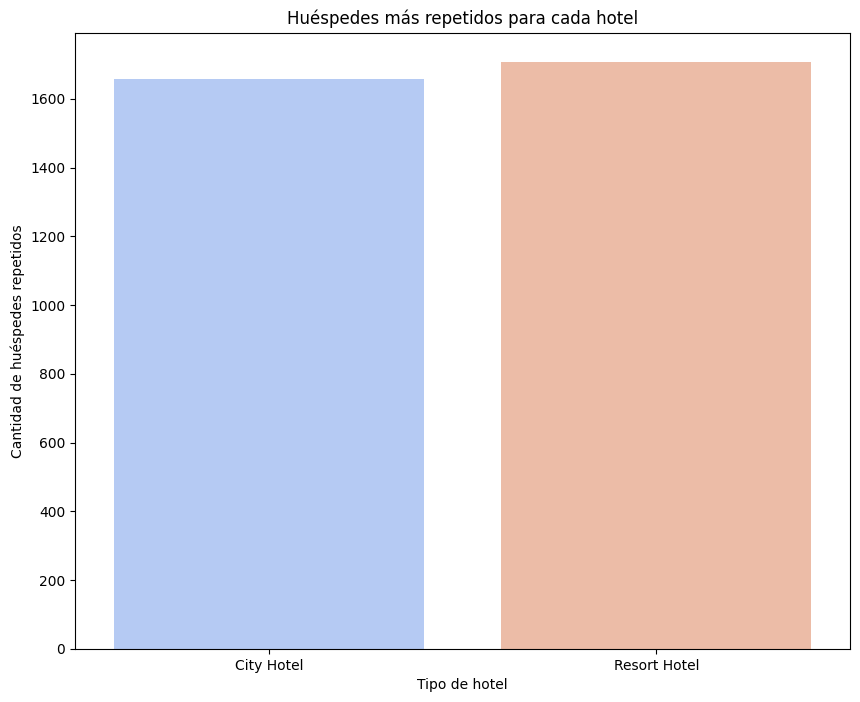

In [158]:
# Huésped repetido = 1
# Huésped no repetido = 0

# Agrupar por hotel
repeated_guests_df = hotel_df[hotel_df['is_repeated_guest'] == 1].groupby('hotel').size().reset_index().rename(columns={0: 'number_of_repeated_guests'})

# Establecer tamaño del gráfico y trazar el gráfico de barras
plt.figure(figsize=(10, 8))
sns.barplot(x=repeated_guests_df['hotel'], y=repeated_guests_df['number_of_repeated_guests'], palette='coolwarm')
plt.xlabel('Tipo de hotel')
plt.ylabel('Cantidad de huéspedes repetidos')
plt.title("Huéspedes más repetidos para cada hotel")

#### 1. ¿Por qué elegiste el gráfico específico?

Los gráficos de barras muestran los recuentos de frecuencia de valores para los diferentes niveles de una variable categórica o nominal. A veces, los gráficos de barras muestran otras estadísticas, como porcentajes.

Para mostrar el recuento de la mayoría de las reservas realizadas por el agente, es por eso que he utilizado un gráfico de barras.

#### 2. ¿Cuál(es) es/son la(s) idea(s) encontrada(s) a partir del gráfico?

El hotel resort tiene ligeramente más huéspedes repetidos que los hoteles de ciudad. Para aumentar el número de huéspedes repetidos, la dirección del hotel necesita obtener comentarios valiosos de los huéspedes e intentar brindar un buen servicio.


#### 3. ¿Las ideas obtenidas ayudarán a crear un impacto comercial positivo? ¿Hay ideas que conduzcan a un crecimiento negativo? Justifica con razones específicas.

Las ideas obtenidas al estudiar el número de huéspedes repetidos en hoteles de ciudad y hoteles resort pueden ayudar a crear un impacto comercial positivo al informar las decisiones empresariales. Por ejemplo, las ideas pueden ayudar a identificar qué tipo de hotel es más popular entre los huéspedes repetidos y pueden ayudar a informar estrategias de marketing y promoción para atraer a más clientes recurrentes.

Sin embargo, también podría haber posibles implicaciones de crecimiento negativo si las ideas se utilizan incorrectamente. Por ejemplo, si las ideas se utilizan para centrar los esfuerzos de marketing únicamente en el tipo de hotel que tiene más huéspedes repetidos, podría haber un riesgo de alienar a posibles clientes que prefieran alojarse en el otro tipo de hotel. Además, si las ideas se utilizan para reducir los precios para los clientes repetidos en el hotel con más huéspedes repetidos, podría haber un riesgo de reducir los ingresos si el hotel tiene precios más altos que el otro tipo de hotel.

### Qué tipo de hotel tiene el ADR más alto?

<Axes: title={'center': 'ADR promedio de cada Tipo de hotel'}, xlabel='Tipo de hotel', ylabel='ADR'>

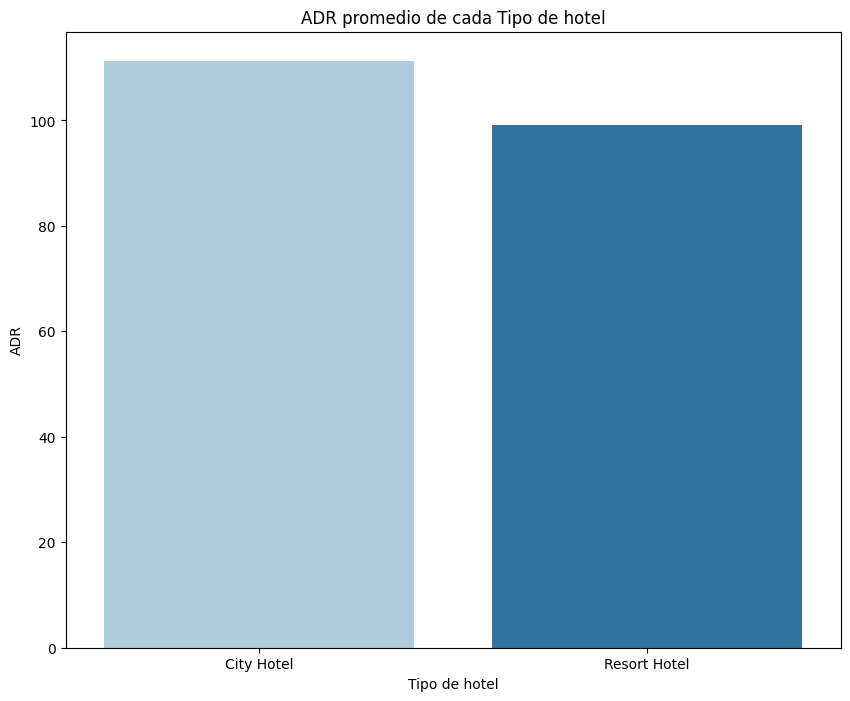

In [112]:
# Visualizando bar chart.

# Grouping by hotel adr
highest_adr = grup_by_hotel['adr'].mean().reset_index()

plt.figure(figsize = (10,8))

plt.xlabel('Tipo de hotel')
plt.ylabel('ADR')
plt.title("ADR promedio de cada Tipo de hotel")

sns.barplot(x = highest_adr['hotel'], y=highest_adr['adr'], palette = 'Paired')

#### 1. ¿Por qué elegiste el gráfico específico?

Los gráficos de barras muestran los recuentos de frecuencia de valores para los diferentes niveles de una variable categórica o nominal. A veces, los gráficos de barras muestran otras estadísticas, como porcentajes.

Para mostrar el recuento de la mayoría de las reservas realizadas por el agente, es por eso que he utilizado un gráfico de barras.

#### 2. ¿Cuál(es) es/son la(s) idea(s) encontrada(s) a partir del gráfico?

El hotel de ciudad tiene el ADR más alto. Eso significa que los hoteles de ciudad están generando más ingresos que los hoteles resort. Cuanto mayor sea el ADR, mayor será el ingreso.

#### 3. ¿Las ideas obtenidas ayudarán a crear un impacto comercial positivo? 
¿Hay ideas que conduzcan a un crecimiento negativo? Justifica con razones específicas.

Sí, las ideas obtenidas pueden ayudar a crear un impacto comercial positivo sobre qué tipo de hotel tiene la tarifa diaria promedio más alta, hoteles de ciudad o hoteles resort. Por ejemplo, las ideas pueden revelar qué tipo de hotel tiene una tasa de ocupación más alta, puntajes de satisfacción del cliente más altos o ingresos por habitación disponible más altos. Esta información puede ayudar al negocio del hotel a identificar en qué tipo de hotel enfocarse más y optimizar sus operaciones y esfuerzos de marketing en consecuencia.

Por otro lado, las ideas también pueden conducir a un crecimiento negativo si no hay suficiente demanda para ciertos tipos de hoteles o si el hotel no puede optimizar sus operaciones o esfuerzos de marketing para atraer a más clientes. Esto podría resultar en una disminución de los ingresos o la tasa de ocupación, lo que podría conducir a un crecimiento negativo.

### Qué tipo de hotel tiene más tiempo de anticipación (lead time)?

Text(0.5, 1.0, 'Tiempo de anticipación promedio para cada tipo de hotel')

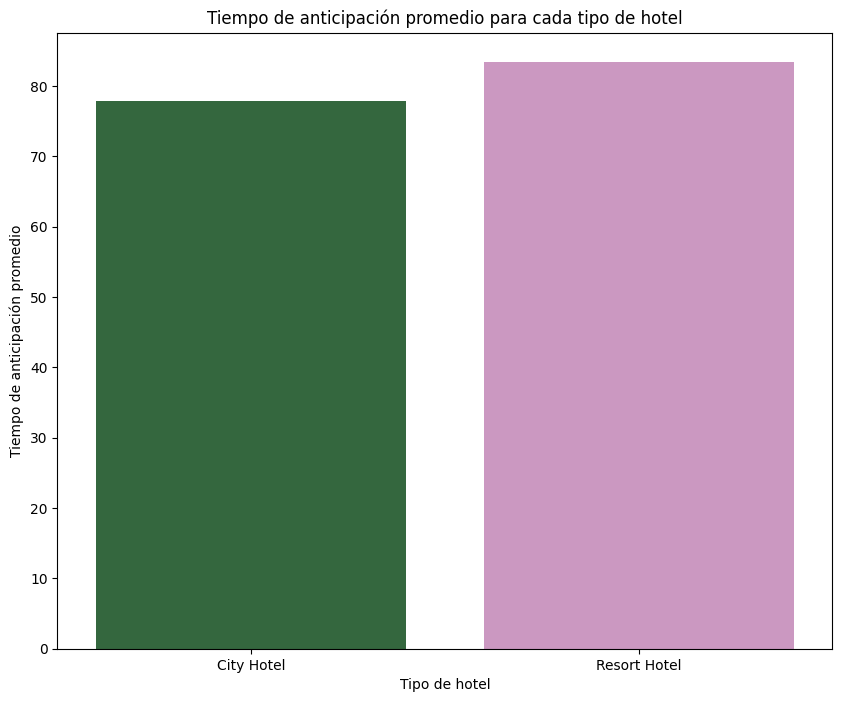

In [111]:
# Visualizando mediante el gráfico de barras.

# Agrupar por hotel y obtener el promedio del tiempo de anticipación
avg_lead_time = hotel_df.groupby('hotel')['lead_time'].mean().reset_index()

# Establecer tamaño del gráfico
plt.figure(figsize=(10, 8))
sns.barplot(x=avg_lead_time['hotel'], y=avg_lead_time['lead_time'], palette='cubehelix')
plt.xlabel('Tipo de hotel')
plt.ylabel('Tiempo de anticipación promedio')
plt.title("Tiempo de anticipación promedio para cada tipo de hotel")

#### 1. ¿Por qué elegiste el gráfico específico?

Los gráficos de barras muestran los recuentos de frecuencia de valores para los diferentes niveles de una variable categórica o nominal. A veces, los gráficos de barras muestran otras estadísticas, como porcentajes.

Para mostrar el recuento de la mayoría de las reservas realizadas por el agente, es por eso que he utilizado un gráfico de barras.

#### 2. ¿Cuál(es) es/son la(s) idea(s) encontrada(s) a partir del gráfico?

El tiempo de anticipación promedio para los hoteles resort es alto. Esto significa que las personas planean su viaje con demasiada anticipación. Por lo general, las personas prefieren los hoteles resort para estancias más largas. Por eso la gente planea con anticipación.

#### 3. ¿Las ideas obtenidas ayudarán a crear un impacto comercial positivo? 
¿Hay ideas que conduzcan a un crecimiento negativo? Justifica con razones específicas.

Las ideas obtenidas pueden ayudar a crear un impacto comercial positivo sobre qué tipo de hotel tiene más tiempo de anticipación, hoteles de ciudad o hoteles resort, según los hallazgos. Por ejemplo, si los insights muestran que los hoteles de ciudad tienen un tiempo de anticipación más alto en comparación con los hoteles resort, entonces el hotel puede centrar sus esfuerzos de marketing más en los hoteles de ciudad para aumentar su ocupación y ganancias totales. Por otro lado, si los insights muestran que los hoteles resort tienen un tiempo de anticipación más alto en comparación con los hoteles de ciudad, entonces el hotel puede centrar sus esfuerzos de marketing más en los hoteles resort para aumentar su ocupación y ganancias totales.

No hay ideas que conduzcan a un crecimiento negativo ya que los insights se centran en comprender el tiempo de anticipación de los hoteles de ciudad y los hoteles resort para determinar en qué tipo de hotel deben centrarse los esfuerzos de marketing. El objetivo es aumentar la ocupación y las ganancias totales. Por lo tanto, los insights no deberían conducir a ningún crecimiento negativo.

### Qué hotel tiene el mayor porcentaje de cancelación de reservas?

Text(0.5, 1.0, 'Porcentaje de cancelación de reservas')

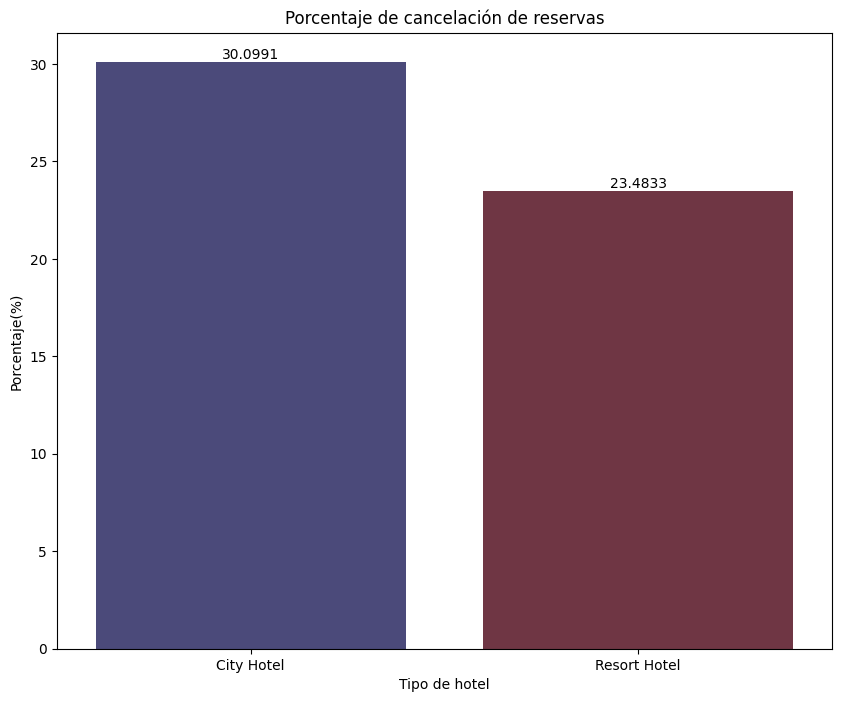

In [162]:
# Visualizando mediante el gráfico de barras.

# Reserva cancelada = 1 
# Reserva no cancelada = 0

# Creando un nuevo DataFrame donde las reservas están canceladas.
canceled_df = hotel_df[hotel_df['is_canceled'] == 1]

# Agrupando por hotel
canceled_df = canceled_df.groupby('hotel').size().reset_index().rename(columns={0: "no_of_cancelled_bookings"})

# Agregando columna 'total booking' para calcular el porcentaje.
total_bookings = hotel_df.groupby('hotel').size().reset_index().rename(columns={0: "total_bookings"})
canceled_df['total_bookings'] = total_bookings['total_bookings']

# Trazando el gráfico de barras
plt.figure(figsize=(10, 8))
ax=sns.barplot(x=canceled_df['hotel'], y=(canceled_df['no_of_cancelled_bookings'] * 100) / canceled_df['total_bookings'], palette='icefire')
for bars in ax.containers:
    ax.bar_label(bars)
plt.xlabel('Tipo de hotel')
plt.ylabel('Porcentaje(%)')
plt.title("Porcentaje de cancelación de reservas")


#### 1. ¿Por qué elegiste el gráfico específico?

Los gráficos de barras muestran los recuentos de frecuencia de valores para los diferentes niveles de una variable categórica o nominal. A veces, los gráficos de barras muestran otras estadísticas, como porcentajes.

Para mostrar el recuento de la mayoría de las reservas realizadas por el agente, es por eso que he utilizado un gráfico de barras.

#### 2. ¿Cuál(es) es/son la(s) idea(s) encontrada(s) a partir del gráfico?

La tasa de cancelación de reservas es alta para los hoteles de ciudad, casi un 30%.

#### 3. ¿Las ideas obtenidas ayudarán a crear un impacto comercial positivo? 
¿Hay ideas que conduzcan a un crecimiento negativo? Justifica con razones específicas.

Las ideas obtenidas pueden ayudar a crear un impacto comercial positivo sobre qué hotel tiene el mayor porcentaje de cancelación de reservas, hoteles de ciudad o hoteles resort. Por ejemplo, los insights pueden revelar qué ciudades tienen las tasas más altas de cancelación de reservas y qué hoteles se encuentran en esas ciudades. A partir de ahí, los gerentes de hotel pueden trabajar para identificar las causas principales de la tasa más alta de cancelación de reservas y tomar medidas para reducirla.

Sin embargo, los insights obtenidos también podrían conducir a un crecimiento negativo si los datos revelan que los clientes no están satisfechos con los servicios u ofertas de los hoteles de ciudad o hoteles resort. En tal caso, los gerentes de hotel necesitarían tomar medidas para mejorar la experiencia del cliente con el fin de fomentar más reservas y reducir cancelaciones.

### Qué hotel tiene un tiempo de espera más largo?

Text(0.5, 1.0, 'Tiempo de espera para cada tipo de hotel')

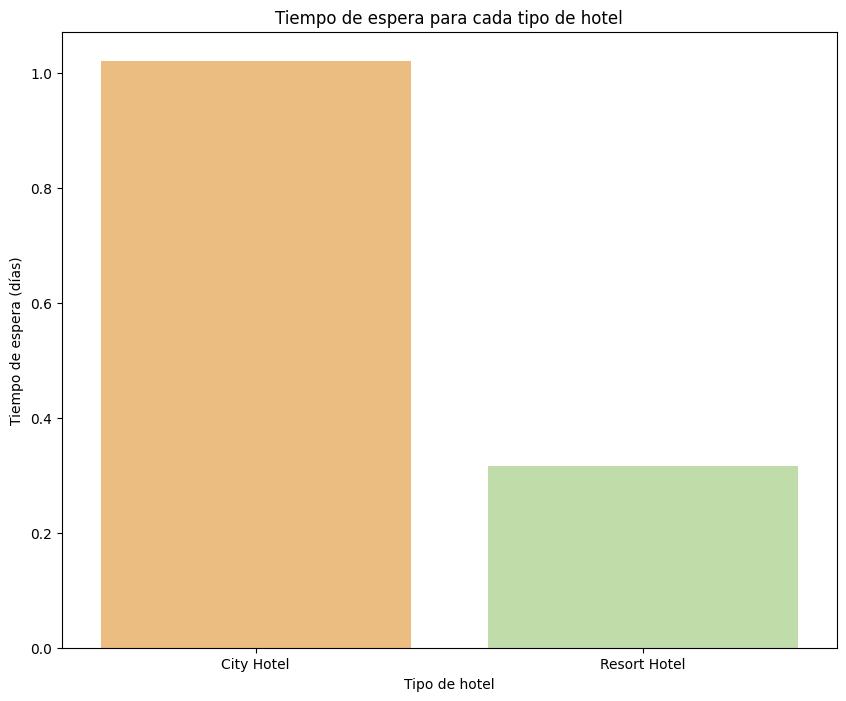

In [114]:
# Visualizando mediante el gráfico de barras.

waiting_time_df = hotel_df.groupby('hotel')['days_in_waiting_list'].mean().reset_index()

plt.figure(figsize=(10, 8))
sns.barplot(x=waiting_time_df['hotel'], y=waiting_time_df['days_in_waiting_list'], palette='Spectral')
plt.xlabel('Tipo de hotel')
plt.ylabel('Tiempo de espera (días)')
plt.title("Tiempo de espera para cada tipo de hotel")

#### 1. ¿Por qué elegiste el gráfico específico?

Los gráficos de barras muestran los recuentos de frecuencia de valores para los diferentes niveles de una variable categórica o nominal. A veces, los gráficos de barras muestran otras estadísticas, como porcentajes.

Para mostrar el recuento de la mayoría de las reservas realizadas por el agente, es por eso que he utilizado un gráfico de barras.

#### 2. ¿Cuál(es) es/son la(s) idea(s) encontrada(s) a partir del gráfico?

El período de tiempo de espera para los hoteles de ciudad es alto en comparación con los hoteles resort. Por lo tanto, podemos decir que los hoteles de ciudad están mucho más ocupados que los hoteles resort.

#### 3. ¿Las ideas obtenidas ayudarán a crear un impacto comercial positivo? 
¿Hay ideas que conduzcan a un crecimiento negativo? Justifica con razones específicas.

Sí, los conocimientos obtenidos pueden ayudar a crear un impacto comercial positivo sobre qué hotel tiene un tiempo de espera más largo, hoteles de ciudad o hoteles resort. Al comprender las razones por las cuales los clientes esperan más en los hoteles de ciudad o en los hoteles resort, las empresas pueden realizar ajustes en sus operaciones para reducir los tiempos de espera y mejorar la satisfacción del cliente. Por ejemplo, podrían implementar sistemas de reservas más eficientes, priorizar el servicio al cliente y asegurarse de que el personal esté adecuadamente capacitado y equipado para manejar las consultas de los clientes.

Por otro lado, los conocimientos obtenidos podrían conducir a un crecimiento negativo si la empresa no realiza los ajustes necesarios para mejorar sus operaciones. Por ejemplo, si la empresa continúa ignorando los tiempos de espera de los clientes, estos podrían volverse cada vez más frustrados y optar por no regresar. Esto podría resultar en una disminución de los ingresos para la empresa, ya que los clientes no están satisfechos con su experiencia.

### ADR a lo largo de los diferentes meses.

In [115]:
# ADR a lo largo de los diferentes meses
bookings_by_months_df = hotel_df.groupby(['arrival_date_month', 'hotel'])['adr'].mean().reset_index()

months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

bookings_by_months_df['arrival_date_month'] = pd.Categorical(bookings_by_months_df['arrival_date_month'], categories=months, ordered=True)
bookings_by_months_df = bookings_by_months_df.sort_values('arrival_date_month')
bookings_by_months_df

,arrival_date_month,hotel,adr
8,January,City Hotel,85.269875
9,January,Resort Hotel,49.181693
6,February,City Hotel,89.266427
7,February,Resort Hotel,54.102809
15,March,Resort Hotel,57.590889
14,March,City Hotel,95.193911
0,April,City Hotel,117.314134
1,April,Resort Hotel,79.283805
17,May,Resort Hotel,80.551101
16,May,City Hotel,128.055724


Text(0, 0.5, 'ADR')

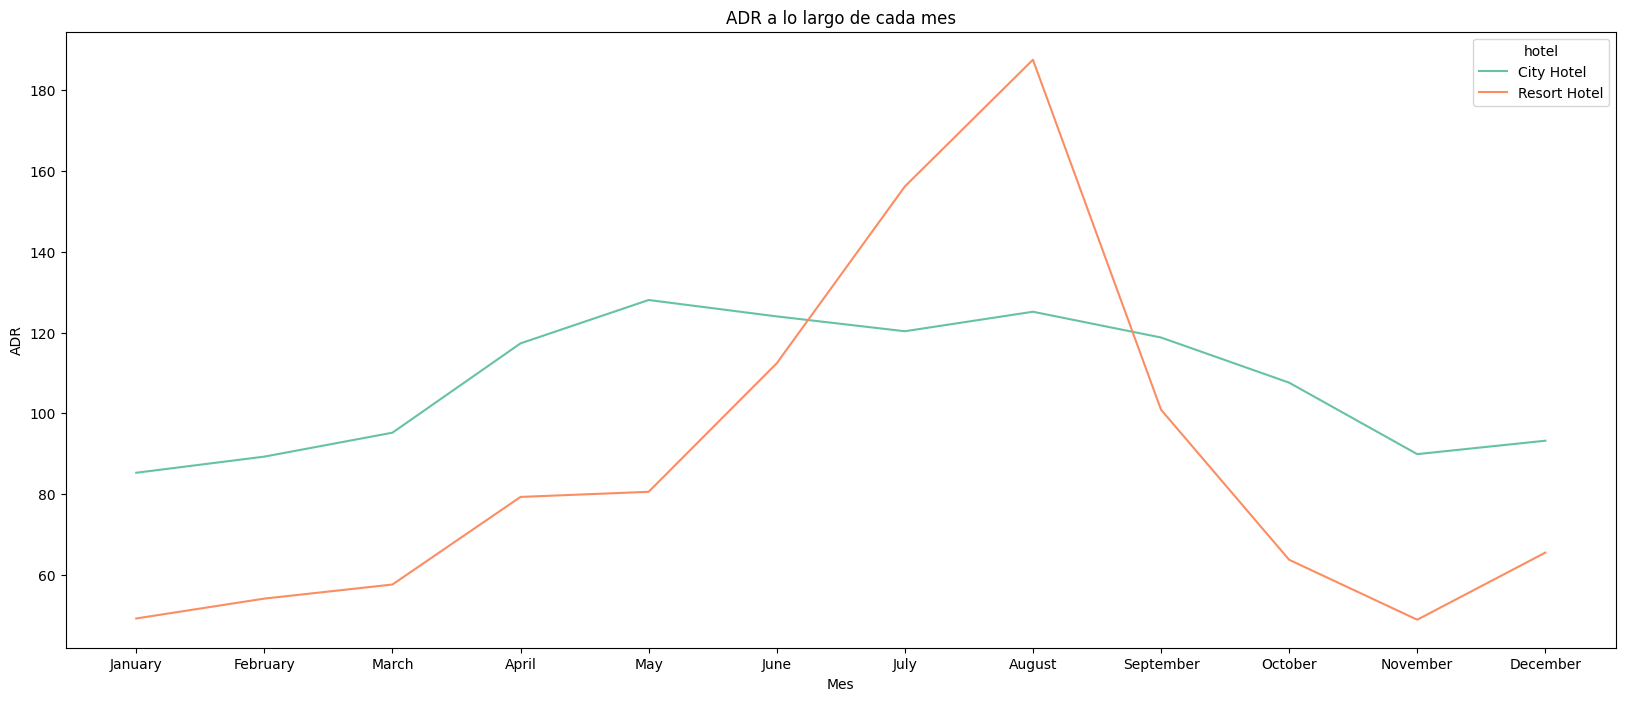

In [116]:
# Establecer el tamaño del gráfico y trazar la línea
plt.figure(figsize=(20, 8))

# Visualización mediante un gráfico de líneas.
sns.lineplot(x=bookings_by_months_df['arrival_date_month'], y=bookings_by_months_df['adr'], hue=bookings_by_months_df['hotel'], palette='Set2')
plt.title('ADR a lo largo de cada mes')
plt.xlabel('Mes')
plt.ylabel('ADR')

#### 1. ¿Por qué elegiste el gráfico específico?

Los gráficos de líneas de Seaborn representan la relación entre valores continuos y categóricos en un formato de puntos de datos continuos. Los gráficos de líneas muestran valores numéricos en un eje y valores categóricos en el otro.

#### 2. ¿Cuál(es) es/son la(s) idea(s) encontrada(s) a partir del gráfico?

Para el hotel Resort, el ADR es alto en los meses de junio, julio y agosto en comparación con los hoteles de ciudad. Esto puede deberse a que los clientes/personas desean pasar sus vacaciones de verano en hoteles resort.

El mejor momento para que los huéspedes visiten hoteles resort o de ciudad es en enero, febrero, marzo, abril, octubre, noviembre y diciembre, ya que la tarifa diaria promedio en estos meses es muy baja.

#### 3. ¿Las ideas obtenidas ayudarán a crear un impacto comercial positivo? 
¿Hay ideas que conduzcan a un crecimiento negativo? Justifica con razones específicas.

Sí, los conocimientos obtenidos pueden ayudar a crear un impacto comercial positivo en la tarifa diaria promedio a lo largo de los diferentes meses para las reservas de hotel. Por ejemplo, si los conocimientos revelan que hay ciertos meses que tienen tasas de reserva más altas debido a un aumento en la demanda de viajes durante esos meses, el hotel puede aumentar sus precios para esos meses para aprovechar la mayor demanda y aumentar su tarifa diaria promedio.

Los conocimientos también pueden ayudar a identificar cualquier crecimiento negativo potencial. Por ejemplo, si los conocimientos muestran que hay ciertos meses que tienen tasas de reserva más bajas debido a una disminución en la demanda de viajes durante esos meses, el hotel puede disminuir sus precios para esos meses para hacerlos más atractivos para los posibles huéspedes y reducir el crecimiento negativo.

### Correlation Heatmap

Text(0.5, 1.0, 'Co-relación de las columnas numéricas')

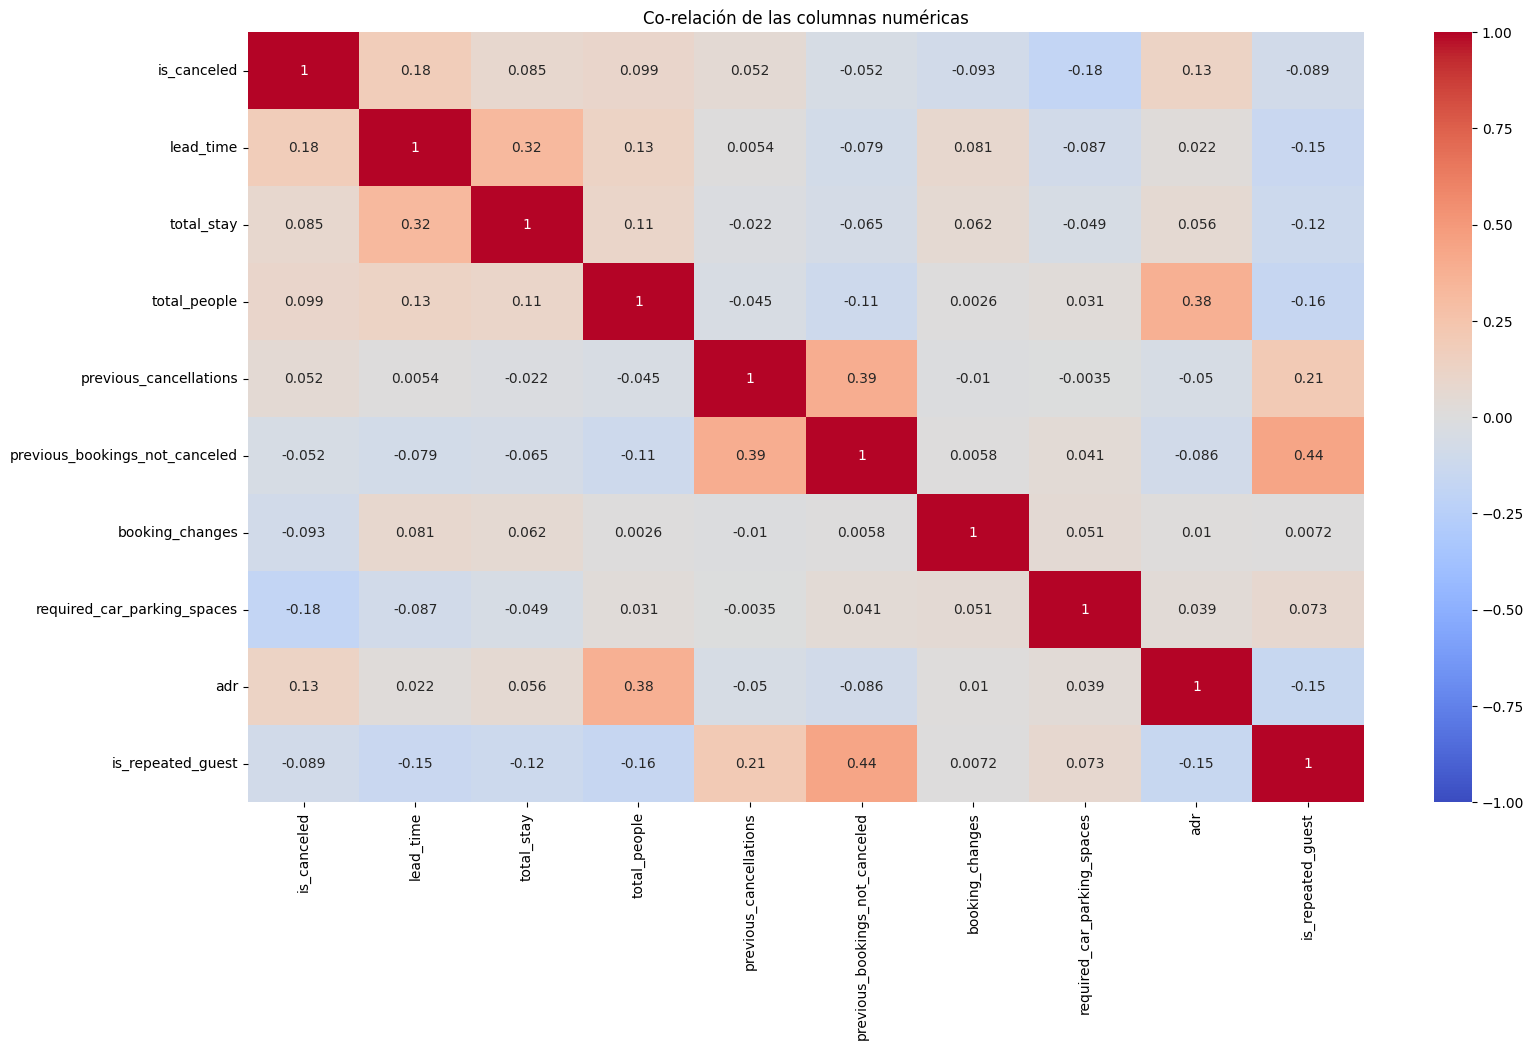

In [172]:
relevant_variables = ['is_canceled','lead_time', 'total_stay', 'total_people', 'previous_cancellations',
                      'previous_bookings_not_canceled', 'booking_changes', 'required_car_parking_spaces',
                      'adr', 'is_repeated_guest']

plt.figure(figsize=(18, 10))
sns.heatmap(hotel_df[relevant_variables].corr(), annot=True, cmap='coolwarm', vmin=-1)
plt.title('Co-relación de las columnas numéricas')

#### 1. ¿Por qué elegiste el gráfico específico?

El gráfico de mapa de calor de correlación es una excelente manera de visualizar las correlaciones entre múltiples variables. Proporciona una vista clara y concisa de las relaciones entre las variables, lo que permite un análisis fácil y rápido. Además, la codificación de colores utilizada en el mapa de calor ayuda a identificar rápidamente las correlaciones que de otra manera no serían tan evidentes.

#### 2. ¿Cuál(es) es/son la(s) idea(s) encontrada(s) a partir del gráfico?

- lead_time y total_stay están correlacionados positivamente. Esto significa que cuanto más tiempo se hospeda el cliente, más tiempo de anticipación habrá en la reserva.

- Total people esta correlacionado positivamente con el ADR. Esto significa que cuanto más personas haya, mayor será el ADR.

- is_repeated_guest y previous_bookings_not_canceled tienen una correlación fuerte. Es posible que los huéspedes repetidos no cancelen sus reservas con tanta frecuencia.

### Pair Plot 

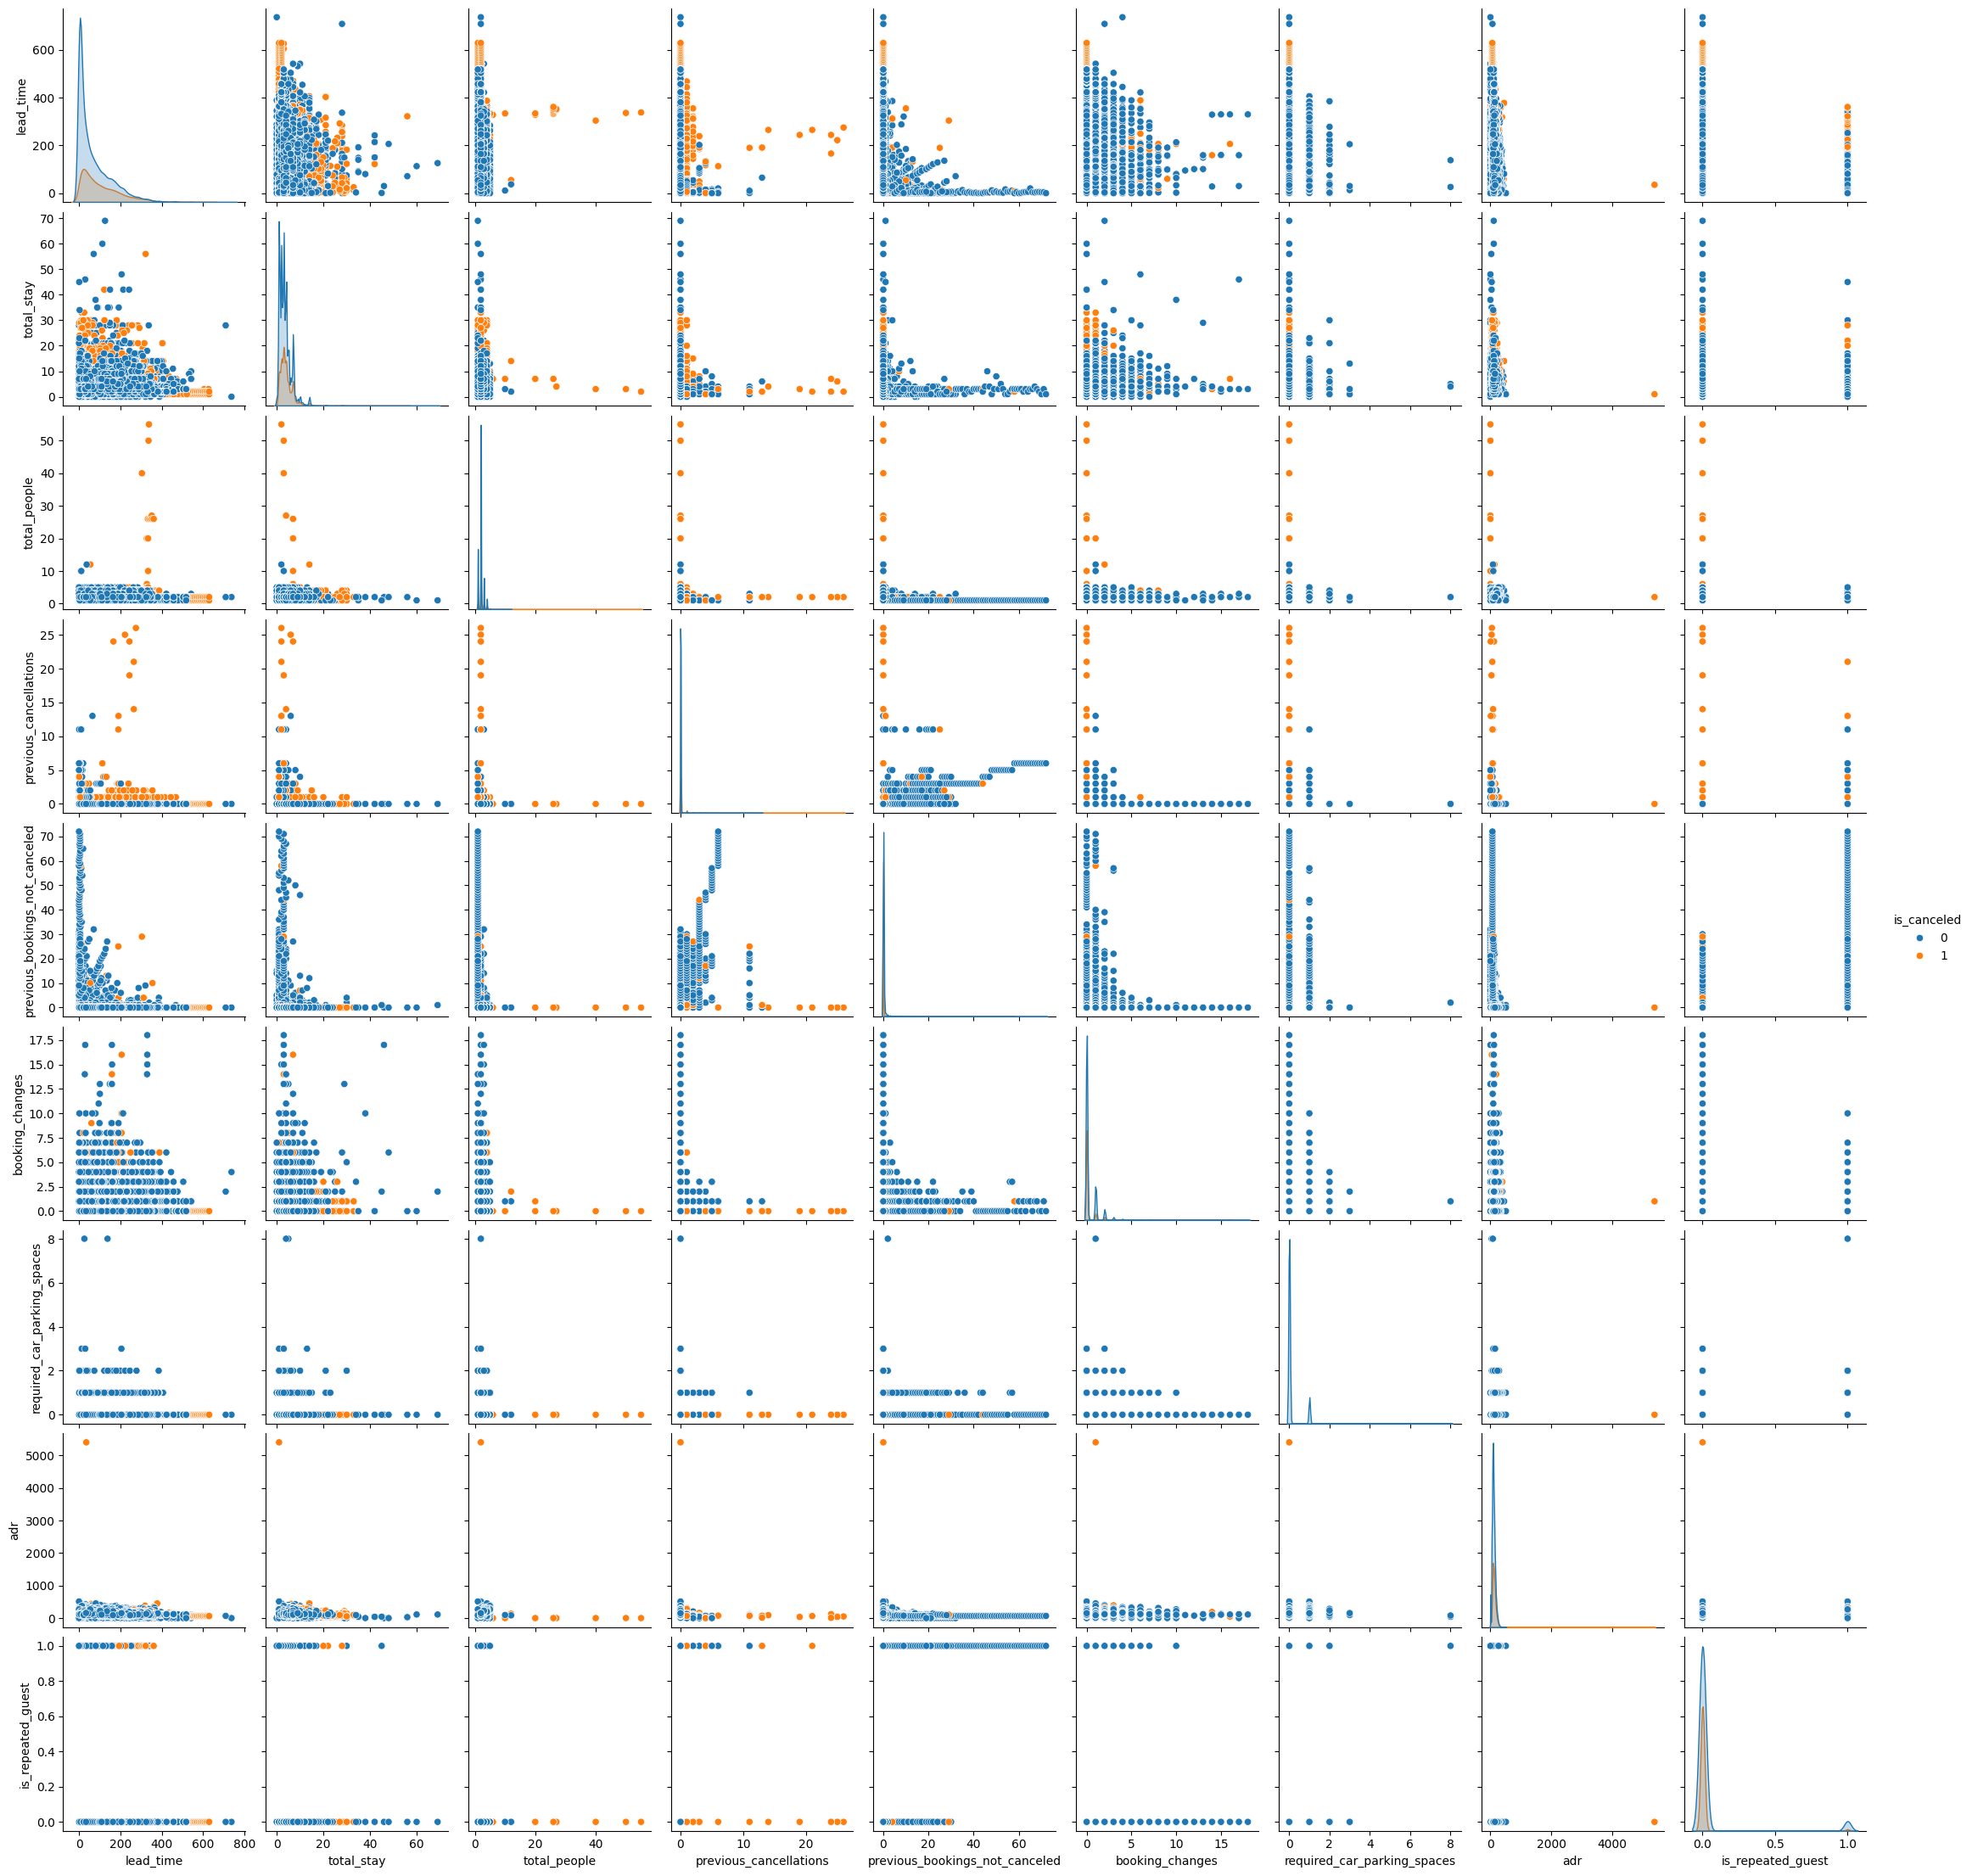

In [173]:
relevant_variables = ['is_canceled','lead_time', 'total_stay', 'total_people', 'previous_cancellations',
                      'previous_bookings_not_canceled', 'booking_changes', 'required_car_parking_spaces',
                      'adr', 'is_repeated_guest']
sns.pairplot(hotel_df[relevant_variables], hue='is_canceled')

#### 1. ¿Por qué elegiste el gráfico específico?

El gráfico de pares se utiliza para entender el mejor conjunto de características para explicar una relación entre dos variables o para formar los clusters más separados. También ayuda a formar algunos modelos de clasificación simples dibujando algunas líneas simples o realizando una separación lineal en nuestro conjunto de datos.

Por lo tanto, utilicé el gráfico de pares para analizar los patrones de datos y la relación entre las características. Es exactamente igual que el mapa de correlación, pero aquí obtendrás una representación gráfica.

#### 2. ¿Cuál(es) es/son la(s) idea(s) encontrada(s) a partir del gráfico?

Del gráfico anterior, me di cuenta de que hay una relación lineal menor entre las variables y los puntos de datos no son linealmente separables.

## Solución para el Objetivo Empresarial

### ¿Qué sugieres al cliente para lograr el Objetivo Empresarial?

* Aumentar la visibilidad del hotel optimizando el SEO local y utilizando canales de marketing digital como Google Ads, Facebook Ads y otras plataformas de redes sociales relevantes.
* Utilizar campañas de marketing por correo electrónico para llegar a clientes potenciales y promover ofertas específicas.
* Configurar campañas dirigidas con influencers y personalidades de las redes sociales para promocionar las ofertas del hotel.
* Implementar un programa de fidelización para recompensar a los clientes recurrentes y alentarlos a reservar nuevamente con el hotel.
* Construir relaciones con agentes de viajes, operadores turísticos y otros sitios web de reservas de hoteles para ampliar el alcance del hotel.
* Utilizar datos e información para identificar las preferencias de los clientes y adaptar las ofertas para satisfacer sus necesidades.
* Crear un sitio web y una aplicación móvil fáciles de usar para aumentar la participación del usuario y facilitar la reserva.
* Utilizar agentes de viajes en línea y sitios web de reservas de hoteles para aumentar la visibilidad y las reservas.
* Aprovechar la tecnología para proporcionar una experiencia al cliente sin problemas.
* Utilizar software de motor de reservas para agilizar el proceso de reserva.

### Conclusión

* Los hoteles de la ciudad son los más preferidos por los huéspedes. Podemos decir que el hotel de la ciudad es el más concurrido.
* El 27.5 % de las reservas fueron canceladas de todas las reservas.
* Solo el 3.9 % de las personas revisitaron los hoteles. El resto, el 96.1 %, fueron nuevos huéspedes. Por lo tanto, la tasa de retención es baja.
* El porcentaje de 0 cambios realizados en la reserva fue más del 82 %. El porcentaje de cambios únicos realizados fue aproximadamente del 10 %.
* La mayoría de los clientes (91.6 %) no requieren espacios de estacionamiento para automóviles.
* El 79.1 % de las reservas se realizaron a través de TA/TO (agentes de viajes / operadores turísticos).
* El BB (cama y desayuno) es el tipo de comida más preferido por los huéspedes.
* El número máximo de huéspedes provenía de Portugal, es decir, más de 25000 huéspedes.
* El ADR promedio para el hotel de la ciudad es alto en comparación con los hoteles resort. Estos hoteles de la ciudad están generando más ingresos que los hoteles resort.
* La tasa de cancelación de reservas es alta para los hoteles de la ciudad, casi el 30 %.
* El tiempo de espera promedio para el hotel resort es alto.
* El período de espera para el hotel de la ciudad es alto en comparación con los hoteles resort. Eso significa que los hoteles de la ciudad están mucho más ocupados que los hoteles resort.
* Los hoteles resort tienen más huéspedes repetidos.
* La estancia óptima en ambos tipos de hoteles es inferior a 7 días. Por lo general, las personas se hospedan durante una semana.
* Casi el 19 % de las personas no cancelaron sus reservas incluso después de no recibir la misma habitación que reservaron al reservar el hotel. Solo el 2.5 % de las personas cancelaron la reserva.